# AlphaFactor Research 01

# Introduction

In [1]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime
import alphalens

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
Prices = pickle.load(open('Prices.pkl', 'rb')) #/content/drive/My Drive/Projects/trading/

In [3]:
train_start = datetime(2016, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [4]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high      low     open    close     volume    adj_close
Date                                                                  
2016-01-01  10015.0  10015.0  10015.0  10015.0        0.0  8272.963867
2016-01-04   9889.0   9571.0   9760.0   9605.0  1972991.0  7934.280273
2016-01-05   9912.0   9550.0   9630.0   9880.0  2359678.0  8161.446777
2016-01-06   9920.0   9645.0   9788.0   9788.0  2946740.0  8085.449219
2016-01-07   9763.0   9120.0   9600.0   9660.0  5489329.0  7979.713867

# Data cleaning and validation

In [5]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [6]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [7]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.218750  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.640625  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.890625  
2017-06-21  182357.875000  
2017-06-22  186854.375000  
2017-06-23  189852.015625  
2017-06-26  189852.015625  
2017-06-27  193848.890625  
2017-06-28  194148.703125  
2017-06-29  195847.359375  
2017-06-30  199944.171875

In [8]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.218750
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.640625
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [9]:
ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = ema12 - ema26
whl['macd_signal_line'] = ta.trend.ema(whl['macd'], periods = 9)

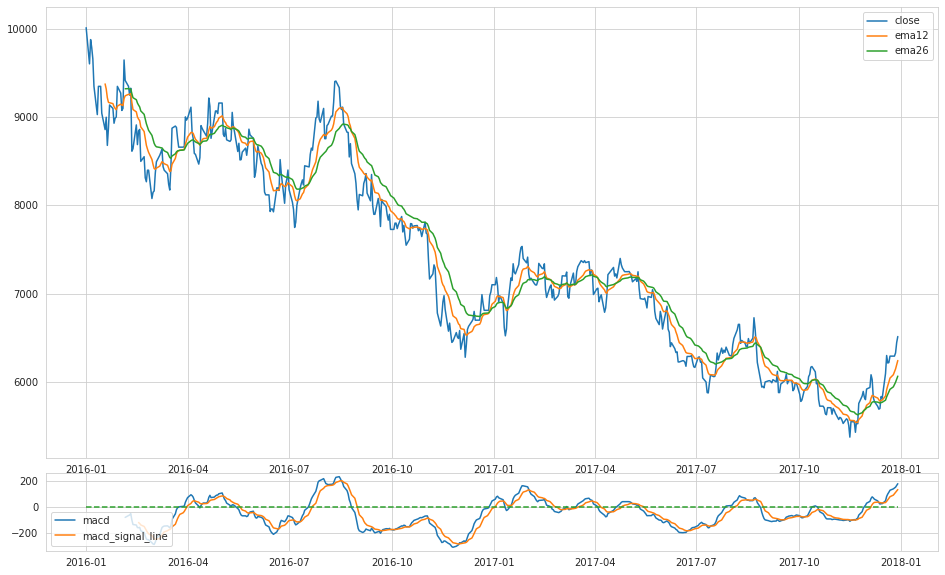

In [10]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal_line'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [11]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        norm_close = data['close']
        
        ema26 = ta.trend.ema(norm_close, periods = 26)
        ema12 = ta.trend.ema(norm_close, periods = 12)
        macd = ema12.sub(ema26)
        macd_ema9 = ta.trend.ema(macd, periods = 9)
        macd_signal = macd_ema9.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [12]:
macd_data.tail()

macd_signal
Date       symbol              
2017-12-25 ZPLP.JO   -53.718039
2017-12-26 ZPLP.JO   -47.688752
2017-12-27 ZPLP.JO   -40.354182
2017-12-28 ZPLP.JO   -32.111094
2017-12-29 ZPLP.JO   -23.848948

In [13]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [14]:
prices_data.index = pd.to_datetime(prices_data.index)

In [15]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 7.7% entries from factor data: 7.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D      factor  factor_quantile
date       asset                                                             
2016-02-17 ABG.JO   0.042994  0.002849 -0.032792 -125.100744                1
2016-02-18 ABG.JO  -0.038491 -0.024390 -0.060849 -152.404576                1
2016-02-19 ABG.JO   0.014665 -0.025235 -0.043269 -119.925054                1
2016-02-22 ABG.JO  -0.039323 -0.049479 -0.114583 -104.244807                1
2016-02-23 ABG.JO  -0.010572  0.002033 -0.058756  -46.965019                1
...                      ...       ...       ...         ...              ...
2017-12-18 ZPLP.JO -0.000160  0.028000  0.023200  -21.912416                1
2017-12-19 ZPLP.JO  0.028165  0.024164  0.023364  -34.654790                1
2017-12-20 ZPLP.JO -0.003891 -0.004669 -0.004981  -51.740460                1
2017-12-21 ZPLP.JO -0.000781 -0.000781 -0.002344  -57.707486                1
2017-12-22 ZPLP.JO  0.000000  0.000000 -0.002346  -57.537588                1

[157291 rows x 5 columns]

In [16]:
%time
volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        volume = data['volume']
        
        vol_sma20 = ta.trend.sma(volume, periods = 5)

        vol_sma20.name = 'volume_oscillator20'
        out = pd.DataFrame(vol_sma20)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        volume_data = pd.concat([volume_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [17]:
volume_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = volume_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1]
)
volume_factor_data

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                        
2016-01-07 ABG.JO   0.015385  1129916.0                3
2016-01-08 ABG.JO  -0.041667  1391682.6                3
2016-01-11 ABG.JO   0.011858  1359832.2                3
2016-01-12 ABG.JO   0.030000  1487951.2                3
2016-01-13 ABG.JO  -0.012060  1798498.2                3
...                      ...        ...              ...
2017-12-22 ZPLP.JO  0.000000    50607.8                2
2017-12-25 ZPLP.JO  0.000000    41872.2                2
2017-12-26 ZPLP.JO -0.000313       68.8                1
2017-12-27 ZPLP.JO -0.001251     2006.6                1
2017-12-28 ZPLP.JO -0.000783     1983.0                1

[168706 rows x 3 columns]

In [18]:
volume_quantiles = volume_factor_data['factor_quantile']
volume_quantiles.name = 'group'

In [19]:
factor_data = pd.concat([factor_data, volume_quantiles], axis = 1).dropna()
factor_data

1D        2D        5D      factor  \
date       asset                                                 
2016-02-17 ABG.JO     0.042994  0.002849 -0.032792 -125.100744   
           ABSP.JO   -0.000872 -0.003791 -0.006572  219.543781   
           ACE.JO     0.000000 -0.066667  0.000000   -0.227640   
           ACG.JO     0.001365 -0.000683  0.002730   -5.161644   
           ACL.JO    -0.039726 -0.004110 -0.013699    0.740830   
...                        ...       ...       ...         ...   
2017-12-22 WSL.JO     0.000000  0.000000  0.012121    0.353278   
           YRK.JO     0.000000  0.000000 -0.044444   -1.657683   
           YYLBEE.JO  0.000000  0.000000  0.000728  -13.264181   
           ZED.JO     0.000000  0.000000  0.028316   -5.564819   
           ZPLP.JO    0.000000  0.000000 -0.002346  -57.537588   

                      factor_quantile  group  
date       asset                              
2016-02-17 ABG.JO                 1.0      3  
           ABSP.JO                3.0      1  
           ACE.JO                 2.0      1  
           ACG.JO                 2.0      2  
           ACL.JO                 3.0      3  
...                               ...    ...  
2017-12-22 WSL.JO                 3.0      2  
           YRK.JO                 2.0      1  
           YYLBEE.JO              1.0      1  
           ZED.JO                 2.0      3  
           ZPLP.JO                1.0      2  

[157291 rows x 6 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.106   0.259   0.093
beta                                            0.596  -0.046   0.296
Mean Period Wise Return Top Quantile (bps)     17.006  12.820   7.508
Mean Period Wise Return Bottom Quantile (bps) -19.034 -15.133  -9.058
Mean Period Wise Spread (bps)                  36.040  27.956  16.593

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

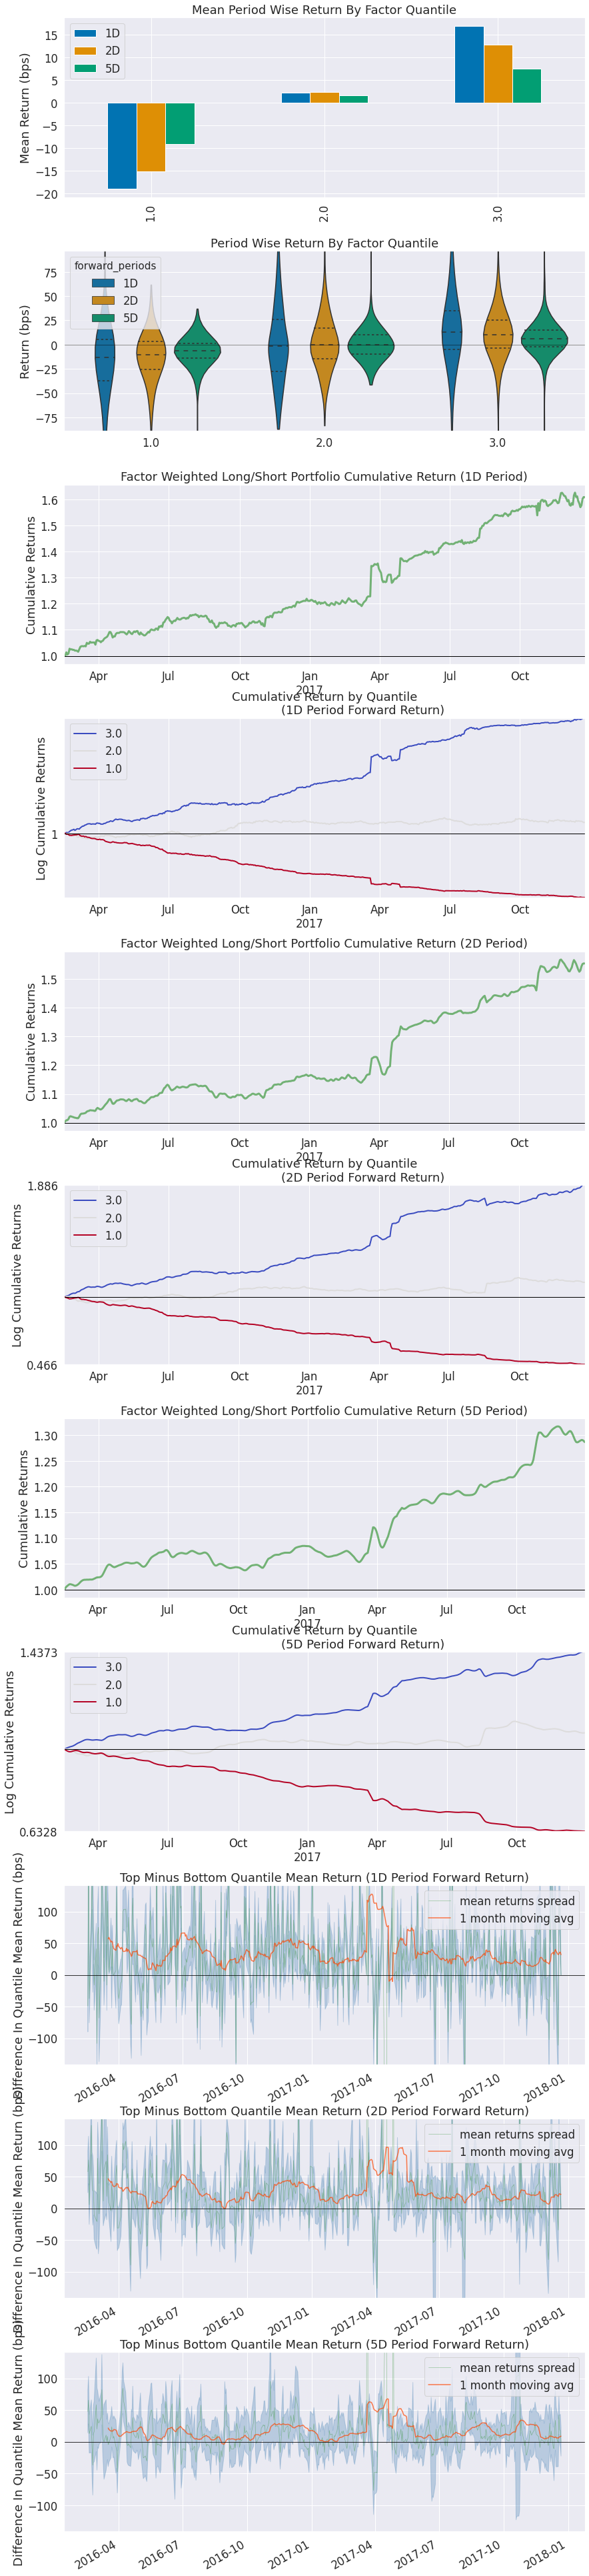

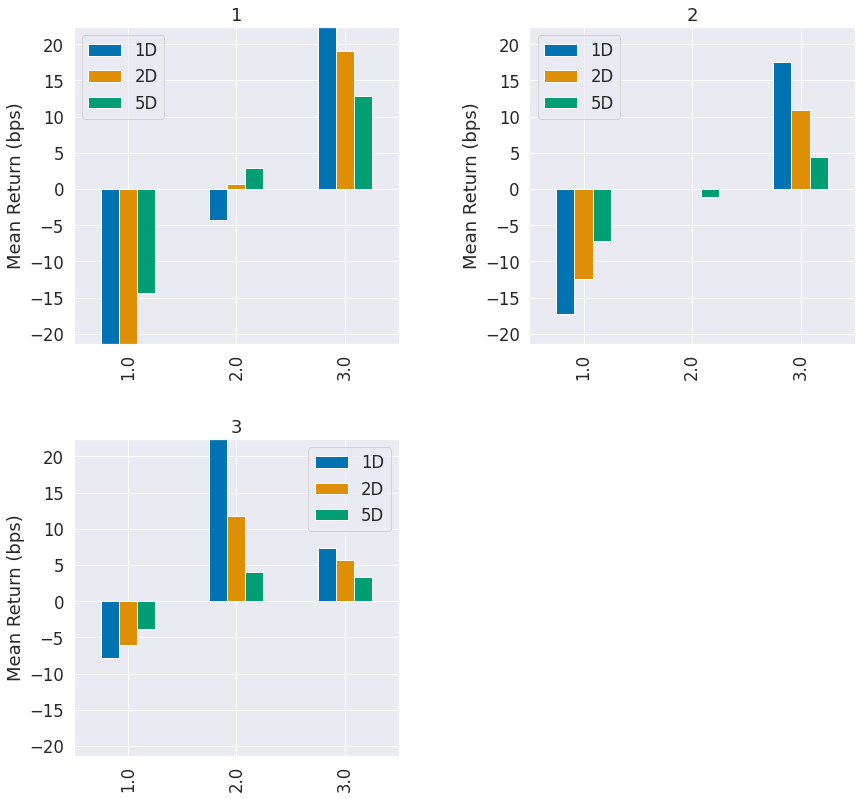

In [20]:
alphalens.tears.create_returns_tear_sheet(factor_data, by_group = True)

In [21]:
weights = alphalens.performance.factor_weights(
    factor_data[factor_data['factor_quantile'].isin([1, 3])])
weights = pd.DataFrame(weights).reset_index().set_index('date').rename(columns = {'factor':'weight'})
weights

asset    weight
date                           
2016-02-17     ABG.JO -0.011741
2016-02-17    ABSP.JO  0.027993
2016-02-17     ACL.JO  0.002768
2016-02-17     ADR.JO  0.004277
2016-02-17     AEL.JO  0.001761
...               ...       ...
2017-12-22     VOD.JO -0.004091
2017-12-22     WHL.JO -0.003077
2017-12-22     WSL.JO  0.000886
2017-12-22  YYLBEE.JO -0.000201
2017-12-22    ZPLP.JO -0.003738

[104990 rows x 2 columns]

In [22]:
# weights = pd.melt(weights.reset_index(), id_vars = ['date'], value_name = 'weight').set_index('date')
# weights

In [23]:
daily_rets = factor_data[['1D', 'factor_quantile']] 
daily_weights = weights.reset_index().set_index(['date', 'asset'])
data = pd.concat([daily_rets, daily_weights], axis = 1).reset_index().set_index('date')
data['weight'] = np.where(data['weight'].isna(), 0, data['weight'])
data

asset        1D  factor_quantile    weight
date                                                      
2016-02-17     ABG.JO  0.042994              1.0 -0.011741
2016-02-17    ABSP.JO -0.000872              3.0  0.027993
2016-02-17     ACE.JO  0.000000              2.0  0.000000
2016-02-17     ACG.JO  0.001365              2.0  0.000000
2016-02-17     ACL.JO -0.039726              3.0  0.002768
...               ...       ...              ...       ...
2017-12-22     WSL.JO  0.000000              3.0  0.000886
2017-12-22     YRK.JO  0.000000              2.0  0.000000
2017-12-22  YYLBEE.JO  0.000000              1.0 -0.000201
2017-12-22     ZED.JO  0.000000              2.0  0.000000
2017-12-22    ZPLP.JO  0.000000              1.0 -0.003738

[157291 rows x 4 columns]

In [24]:
adh_weights = data[data['asset'] == 'WHL.JO']
adh_weights

asset        1D  factor_quantile    weight
date                                                   
2016-02-17  WHL.JO  0.001922              3.0  0.007214
2016-02-18  WHL.JO -0.040849              3.0  0.005672
2016-02-19  WHL.JO  0.006235              3.0  0.007228
2016-02-22  WHL.JO -0.027943              3.0  0.006845
2016-02-23  WHL.JO -0.005413              3.0  0.008159
...            ...       ...              ...       ...
2017-12-18  WHL.JO  0.033465              1.0 -0.002648
2017-12-19  WHL.JO -0.013492              1.0 -0.003125
2017-12-20  WHL.JO  0.000805              1.0 -0.003091
2017-12-21  WHL.JO  0.011736              1.0 -0.002987
2017-12-22  WHL.JO  0.000000              1.0 -0.003077

[479 rows x 4 columns]

Text(0, 0.5, 'Daily returns')

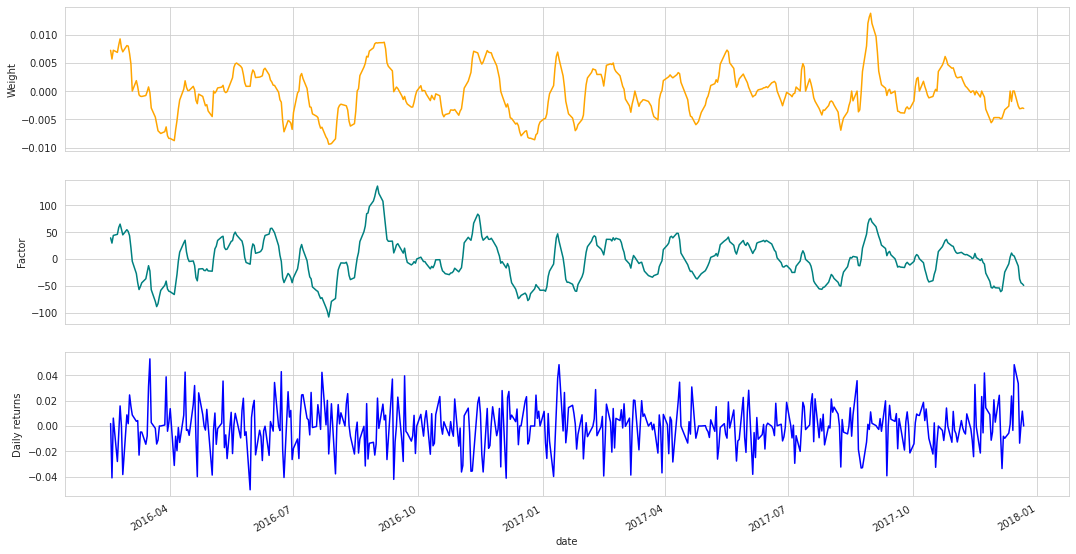

In [25]:
fig, axes = plt.subplots(3, 1, figsize = (18, 10), sharex = True)

g = adh_weights['weight'].plot(color = 'orange', ax = axes[0])
g.set_ylabel('Weight')

df = factor_data.reset_index().set_index('date')
df = df[df['asset'] == 'WHL.JO']
g = df['factor'].plot(color = 'teal', ax = axes[1])
g.set_ylabel('Factor')
g = df['1D'].plot(color = 'blue', ax = axes[2])
g.set_ylabel('Daily returns')

In [26]:
portfolio_initial_value = 1

In [27]:
def getCumulativeReturns(returns):
    cumulative_returns = returns.cumsum()
    return cumulative_returns

In [28]:
data['portfolio_returns'] = data['1D'].mul(data['weight'])

In [29]:
factor_quantiles_cumulative_returns = pd.DataFrame()
for asset in data['asset'].unique():
    filtered_data = data[data['asset'] == asset].copy()
    portfolio_returns = getCumulativeReturns(
        returns = filtered_data['portfolio_returns'])
    filtered_data['portfolio_returns'] = portfolio_returns
    factor_quantiles_cumulative_returns = pd.concat([
        factor_quantiles_cumulative_returns, filtered_data
    ])

In [30]:
data = factor_quantiles_cumulative_returns.reset_index()
long_short = data.groupby(['date']).sum().add(portfolio_initial_value) #[data['factor_quantile'].isin([1, 3])]
filt_data_short = data[data['factor_quantile'] == 1].groupby(['date']).sum().mul(-1).add(portfolio_initial_value)
filt_data_middle = data[data['factor_quantile'] == 2].groupby(['date']).sum().add(portfolio_initial_value)
filt_data_long = data[data['factor_quantile'] == 3].groupby(['date']).sum().add(portfolio_initial_value)

Text(0, 0.5, 'Cumulative Returns \n')

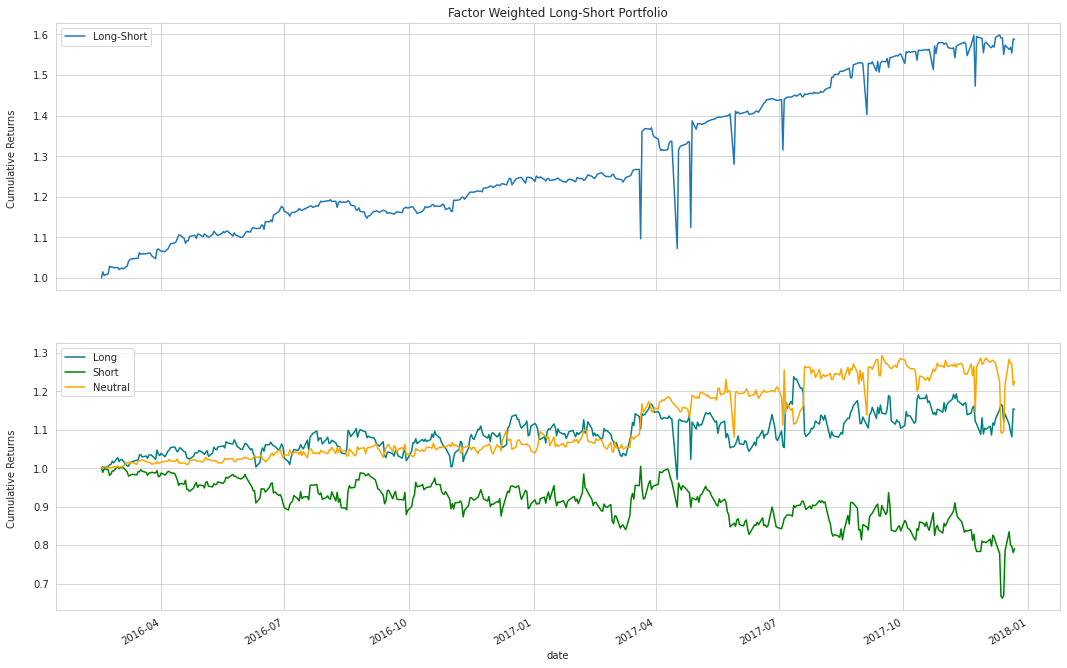

In [31]:
fig, axes = plt.subplots(2, 1, figsize = (18, 12), sharex = True)
g = long_short['portfolio_returns'].plot(ax = axes[0])
g.legend(('Long-Short', ))
g.set_title('Factor Weighted Long-Short Portfolio')
g.set_ylabel('Cumulative Returns \n')

g = filt_data_long['portfolio_returns'].plot(ax = axes[1], color = 'teal')
g = filt_data_short['portfolio_returns'].plot(ax = axes[1], color = 'green')
g = filt_data_middle['portfolio_returns'].plot(ax = axes[1], color = 'orange')
g.legend(('Long', 'Short', 'Neutral' ))
g.set_ylabel('Cumulative Returns \n')

# A Quantamental Approach

In [32]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Universe Selection

## Feature Engineering

### Labeling

In [107]:
cusumTrainPrices = {}
for symbol, data in trainPrices.items():
    
    if len(data) > lookback:
        lookback = 5
        ### EVENT BASED FILTERING
        data = data.copy()
        close = data['close']

        daily_vol = ml.util.get_daily_vol(
            close, 
            lookback = lookback)
        
        if daily_vol.nunique() != 1:

            # Apply Symmetric CUSUM Filter and get timestamps for events
            # Note: Only the CUSUM filter needs a point estimate for volatility
            cusum_events = ml.filters.cusum_filter(
                close,
                threshold = daily_vol)
            data_filt = data.loc[cusum_events]


            ### LABELING
            # Compute vertical barrier
            close = data_filt['close']
            
            if len(close) > lookback:

                daily_vol = ml.util.get_daily_vol(
                    close, 
                    lookback = lookback)

                num_days_ahead = 1
                vertical_barriers = ml.labeling.add_vertical_barrier(
                    t_events = cusum_events,
                    close = close,
                    num_days = num_days_ahead)

                pt_sl = [1, 1] # .1, .5
                min_ret = 0.005

                triple_barrier_events = ml.labeling.get_events(
                    close = close,
                    t_events = cusum_events,
                    pt_sl = pt_sl,
                    target = daily_vol,
                    min_ret = min_ret,
                    num_threads = 1,
                    vertical_barrier_times = vertical_barriers,
                    verbose = False)

                labels = ml.labeling.get_bins(
                    triple_barrier_events, close)
                target = labels['bin']
                target.name = 'label'
                out = pd.concat([data_filt, target], axis = 1)
                cusumTrainPrices[symbol] = out

In [108]:
whl_data = cusumTrainPrices['WHL.JO'].copy()
whl_data

high     low    open   close     volume    adj_close  label
2016-01-05  9912.0  9550.0  9630.0  9880.0  2359678.0  8161.446777    NaN
2016-01-07  9763.0  9120.0  9600.0  9660.0  5489329.0  7979.713867    NaN
2016-01-08  9700.0  9279.0  9660.0  9350.0  4987165.0  7723.634766   -1.0
2016-01-11  9186.0  8963.0  9150.0  9030.0  8062228.0  7459.298340    1.0
2016-01-12  9446.0  8879.0  9030.0  9350.0  9444683.0  7723.634766   -1.0
...            ...     ...     ...     ...        ...          ...    ...
2017-12-12  5849.0  5628.0  5750.0  5692.0  3761626.0  5124.838379    0.0
2017-12-14  5894.0  5705.0  5705.0  5835.0  8117385.0  5253.589844    1.0
2017-12-18  6157.0  5787.0  5850.0  6096.0  6744774.0  5488.583008    0.0
2017-12-22  6326.0  6222.0  6283.0  6293.0  1920416.0  5665.954102    0.0
2017-12-28  6447.0  6300.0  6320.0  6447.0  2857012.0  5804.608887    NaN

[194 rows x 7 columns]

In [109]:
whl_data['emalong'] = ta.trend.ema(whl_data['close'], periods = 6)
whl_data['emashort'] =ta.trend.ema(whl_data['close'], periods = 4)

whl_data['macd'] = whl_data['emashort'] - whl_data['emalong']
whl_data['macd_ema'] = ta.trend.ema(whl_data['macd'], periods = 2)
whl_data['signal'] = whl_data['macd_ema'].sub(whl_data['macd'])
whl_data.dropna()

high     low    open   close      volume    adj_close  label  \
2016-01-20  9072.0  8601.0  8810.0  8681.0   5692607.0  7171.004395    1.0   
2016-01-21  8919.0  8626.0  8681.0  8881.0  12171850.0  7336.214844    1.0   
2016-01-29  9350.0  8801.0  9025.0  9350.0  30390044.0  7723.634766    0.0   
2016-02-02  9428.0  9065.0  9319.0  9077.0   4293551.0  7498.121582    1.0   
2016-02-04  9649.0  9200.0  9200.0  9649.0   4575451.0  7970.627930    0.0   
...            ...     ...     ...     ...         ...          ...    ...   
2017-12-07  6084.0  5808.0  6029.0  5827.0   3878443.0  5246.386719    0.0   
2017-12-12  5849.0  5628.0  5750.0  5692.0   3761626.0  5124.838379    0.0   
2017-12-14  5894.0  5705.0  5705.0  5835.0   8117385.0  5253.589844    1.0   
2017-12-18  6157.0  5787.0  5850.0  6096.0   6744774.0  5488.583008    0.0   
2017-12-22  6326.0  6222.0  6283.0  6293.0   1920416.0  5665.954102    0.0   

                emalong     emashort        macd    macd_ema     signal  
2016-01-20  9150.354818  9016.161920 -134.192898 -122.293114  11.899784  
2016-01-21  9073.396299  8962.097152 -111.299147 -114.963802  -3.664656  
2016-01-29  9152.425928  9117.258291  -35.167636  -61.766358 -26.598722  
2016-02-02  9130.875663  9101.154975  -29.720688  -40.402578 -10.681890  
2016-02-04  9278.911188  9320.292985   41.381797   14.120339 -27.261458  
...                 ...          ...         ...         ...        ...  
2017-12-07  5838.471994  5879.111192   40.639198   47.987525   7.348326  
2017-12-12  5796.622853  5804.266715    7.643863   21.091750  13.447887  
2017-12-14  5807.587752  5816.560029    8.972277   13.012101   4.039824  
2017-12-18  5889.991251  5928.336018   38.344766   29.900545  -8.444222  
2017-12-22  6005.136608  6074.201611   69.065002   56.010183 -13.054819  

[187 rows x 12 columns]

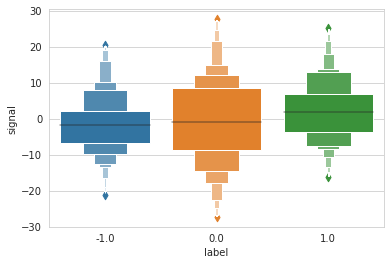

In [110]:
sns.boxenplot(data = whl_data, x = 'label', y = 'signal')

In [111]:
target = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    labels = data[['label']]
    labels['asset'] = symbol
    labels.index.name = 'date'
    labels = labels.reset_index().set_index(['date', 'asset'])
    target = pd.concat([target, labels])

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [112]:
target.dropna(inplace = True)
target

label
date       asset         
2017-11-03 4SI.JO    -1.0
2017-11-07 4SI.JO    -1.0
2017-11-08 4SI.JO     1.0
2017-11-13 4SI.JO     0.0
2017-11-20 4SI.JO     0.0
...                   ...
2017-12-04 ZPLP.JO    0.0
2017-12-07 ZPLP.JO    0.0
2017-12-14 ZPLP.JO    0.0
2017-12-15 ZPLP.JO    1.0
2017-12-18 ZPLP.JO    0.0

[51412 rows x 1 columns]

In [113]:
(target['label'].value_counts() / len(target)).mul(100).round(2)

 0.0    58.07
 1.0    21.29
-1.0    20.64
Name: label, dtype: float64

### Moving Average Convergence Divergence and the impact of traded volume

In [114]:
# ta.trend.ema()
filtered_data = cusumTrainPrices['WHL.JO'].copy()
ema26 = ta.trend.ema(filtered_data['close'], periods = 6)
ema12 =ta.trend.ema(filtered_data['close'], periods = 4)

filtered_data['ema26'] = ema26
filtered_data['ema12'] = ema12

filtered_data['macd'] = ema12 - ema26
filtered_data['macd_signal_line'] = ta.trend.ema(filtered_data['macd'], periods = 2)
filtered_data['signal'] = filtered_data['macd_signal_line'].sub(filtered_data['macd'])

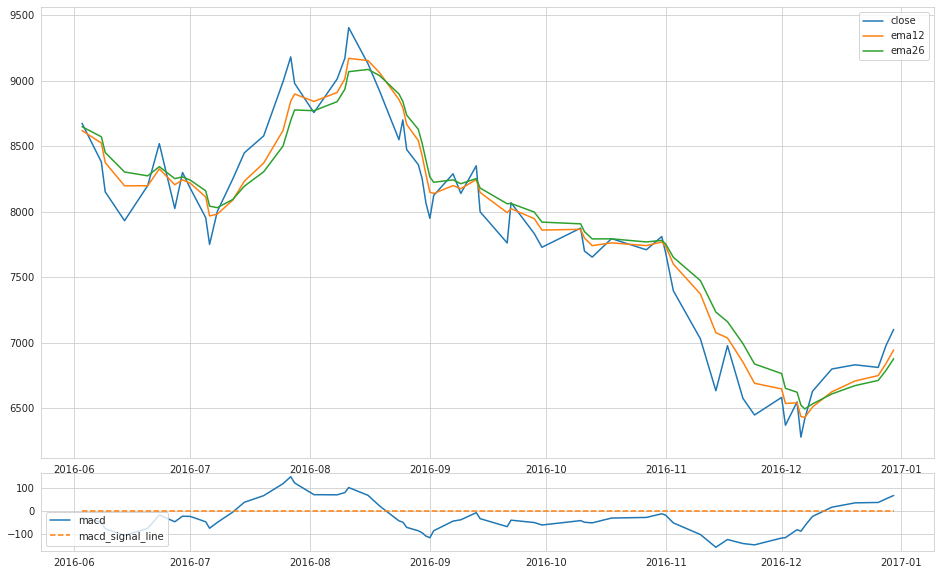

In [115]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = filtered_data.loc[datetime(2016, 6, 1):datetime(2016, 12, 31)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['ema12'])
ax1.plot(data.index, data['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['macd'])
# ax2.plot(data.index, data['signal'].diff())
ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [116]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        emalong = ta.trend.ema(close, periods = 6)
        emashort = ta.trend.ema(close, periods = 4)
        macd = emashort.sub(emalong)
        macd_ema = ta.trend.ema(macd, periods = 2)
        macd_signal = macd_ema.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [117]:
macd_data

macd_signal
Date       symbol              
2017-10-24 4SI.JO           NaN
2017-10-27 4SI.JO           NaN
2017-11-03 4SI.JO           NaN
2017-11-07 4SI.JO           NaN
2017-11-08 4SI.JO           NaN
...                         ...
2017-12-07 ZPLP.JO    -3.114320
2017-12-14 ZPLP.JO     4.731060
2017-12-15 ZPLP.JO    -3.448026
2017-12-18 ZPLP.JO   -14.378569
2017-12-20 ZPLP.JO   -15.264344

[53262 rows x 1 columns]

In [118]:
cusumTrainPrices['ZPLP.JO']

high     low    open   close    volume  adj_close  label
date                                                                  
2016-01-06  4000.0  4000.0  4000.0  4000.0    1200.0     4000.0    NaN
2016-01-11  3900.0  3800.0  3880.0  3900.0  117878.0     3900.0    NaN
2016-01-14  4000.0  3800.0  3800.0  4000.0   21933.0     4000.0   -1.0
2016-01-19  3900.0  3840.0  3889.0  3840.0   68792.0     3840.0    1.0
2016-01-28  4000.0  3985.0  3985.0  4000.0   49987.0     4000.0   -1.0
...            ...     ...     ...     ...       ...        ...    ...
2017-12-07  5950.0  5815.0  5949.0  5950.0  186354.0     5950.0    0.0
2017-12-14  5900.0  5759.0  5900.0  5759.0   88824.0     5759.0    0.0
2017-12-15  5950.0  5850.0  5850.0  5950.0   35717.0     5950.0    1.0
2017-12-18  6250.0  5950.0  5950.0  6250.0   43678.0     6250.0    0.0
2017-12-20  6425.0  6250.0  6250.0  6425.0      12.0     6425.0    NaN

[150 rows x 7 columns]

In [119]:
prices_data = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)
prices_data.index = pd.to_datetime(prices_data.index)
prices_data

4SI.JO   ABG.JO  ABSP.JO  ACE.JO  ACG.JO  ACL.JO  ACS.JO  ACT.JO  \
2016-01-05     NaN  13816.0  69550.0     NaN  1730.0   425.0     NaN   530.0   
2016-01-06     NaN      NaN      NaN     NaN  1710.0   410.0     NaN   520.0   
2016-01-07     NaN  13000.0  69000.0     NaN  1675.0   451.0   900.0     NaN   
2016-01-08     NaN      NaN  70000.0    75.0     NaN   565.0     NaN   510.0   
2016-01-11     NaN  12650.0      NaN     NaN  1650.0     NaN     NaN   500.0   
...            ...      ...      ...     ...     ...     ...     ...     ...   
2017-12-25     NaN      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-26   179.0      NaN      NaN     NaN   399.0     NaN     NaN     NaN   
2017-12-27     NaN      NaN      NaN     NaN   380.0     NaN     NaN   650.0   
2017-12-28     NaN      NaN      NaN     NaN     NaN   400.0     NaN     NaN   
2017-12-29   170.0  18106.0      NaN     NaN     NaN     NaN     NaN     NaN   

            ADH.JO  ADI.JO  ...  VLE.JO   VOD.JO  WEA.JO  WHL.JO  WSL.JO  \
2016-01-05  1465.0  1350.0  ...   327.0  15080.0     NaN  9880.0   100.0   
2016-01-06     NaN     NaN  ...     NaN      NaN     NaN     NaN     NaN   
2016-01-07  1470.0  1241.0  ...     NaN  14595.0     NaN  9660.0     NaN   
2016-01-08  1479.0  1347.0  ...   324.0  14877.0     NaN  9350.0     NaN   
2016-01-11     NaN     NaN  ...     NaN  14659.0     NaN  9030.0    93.0   
...            ...     ...  ...     ...      ...     ...     ...     ...   
2017-12-25     NaN     NaN  ...     NaN      NaN     NaN     NaN     NaN   
2017-12-26     NaN     NaN  ...   391.0      NaN     NaN     NaN     NaN   
2017-12-27  1635.0     NaN  ...     NaN      NaN     NaN     NaN   166.0   
2017-12-28     NaN   641.0  ...     NaN      NaN    0.08  6447.0     NaN   
2017-12-29  1691.0     NaN  ...     NaN  14559.0     NaN     NaN     NaN   

            YRK.JO  YYLBEE.JO  ZCL.JO  ZED.JO  ZPLP.JO  
2016-01-05   222.0        NaN     NaN   571.0      NaN  
2016-01-06   215.0        NaN     NaN   554.0   4000.0  
2016-01-07     NaN        NaN     NaN   520.0      NaN  
2016-01-08     NaN        NaN     NaN     NaN      NaN  
2016-01-11     NaN        NaN     NaN   511.0   3900.0  
...            ...        ...     ...     ...      ...  
2017-12-25     NaN        NaN     NaN     NaN      NaN  
2017-12-26     NaN        NaN     NaN     NaN      NaN  
2017-12-27     NaN        NaN   320.0     NaN      NaN  
2017-12-28   259.0        NaN     NaN   667.0      NaN  
2017-12-29     NaN        NaN     NaN   690.0      NaN  

[515 rows x 350 columns]

In [121]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 4.6% entries from factor data: 4.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-11-20 4SI.JO  -0.070352  0.030151 -0.100503  -0.197486                1
2017-11-21 4SI.JO   0.108108  0.108108  0.059459   0.007492                2
2017-11-22 4SI.JO   0.000000  0.000000 -0.043902  -1.111740                1
2017-11-27 4SI.JO   0.094972  0.094972  0.033520  -0.114048                2
2017-11-28 4SI.JO   0.000000  0.000000  0.020408  -0.861425                2
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101  -3.114320                1
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645   4.731060                3
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832  -3.448026                1
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -14.378569                1
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -15.264344                1

[50829 rows x 5 columns]

In [122]:
%time
volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        volume = data['volume']
        
        vol_sma = ta.trend.ema(volume, periods = 4)

        vol_sma.name = 'volume_oscillator20'
        out = pd.DataFrame(vol_sma)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        volume_data = pd.concat([volume_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [123]:
def createGroupingFactor(factor_data, 
                         group_data, 
                         prices_data, 
                         num_groupes = 3):
    group_factor_data = alphalens\
    .utils.get_clean_factor_and_forward_returns(
        factor = group_data,
        prices = prices_data,
        quantiles = num_groupes,
        periods = [1]
    )
    volume_factor_data

    qroup_quantiles = group_factor_data['factor_quantile']
    qroup_quantiles.name = 'group'
    factor_data_w_group = pd.concat(
        [factor_data, qroup_quantiles], 
        axis = 1).dropna()
    return factor_data_w_group

In [124]:
factor_data = createGroupingFactor(
    factor_data, 
    group_data = volume_data, 
    prices_data = prices_data, 
    num_groupes = 3)
factor_data

Dropped 2.1% entries from factor data: 2.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile  \
date       asset                                                              
2016-01-14 ACG.JO -0.024615 -0.049231 -0.110154   0.709083              3.0   
           GPL.JO  0.000000  0.000000 -0.048718   0.256932              1.0   
2016-01-15 ACG.JO -0.025237 -0.041009 -0.087697   1.619174              2.0   
           CND.JO  0.000000  0.000000 -0.028927   0.466069              1.0   
           CTA.JO -0.047619 -0.047619 -0.085714  -0.197524              1.0   
...                     ...       ...       ...        ...              ...   
2017-12-22 TRL.JO  0.000000  0.000000  0.028571   0.350889              3.0   
           TWR.JO  0.000000  0.000000  0.022222  -0.009033              2.0   
           VOD.JO  0.000000  0.000000  0.034020   5.048420              3.0   
           WEA.JO  0.000000  0.000000  0.333333   0.000462              3.0   
           WHL.JO  0.000000  0.000000  0.024472 -13.054819              1.0   

                   group  
date       asset          
2016-01-14 ACG.JO      1  
           GPL.JO      2  
2016-01-15 ACG.JO      2  
           CND.JO      1  
           CTA.JO      2  
...                  ...  
2017-12-22 TRL.JO      1  
           TWR.JO      1  
           VOD.JO      3  
           WEA.JO      3  
           WHL.JO      3  

[50829 rows x 6 columns]

In [125]:
# factor_data.drop(['group'], axis = 1, inplace = True)

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.474   0.116   0.162
beta                                            0.005   0.039   0.170
Mean Period Wise Return Top Quantile (bps)     22.468   9.409   7.395
Mean Period Wise Return Bottom Quantile (bps) -32.550 -14.140 -10.372
Mean Period Wise Spread (bps)                  55.019  23.547  17.770

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

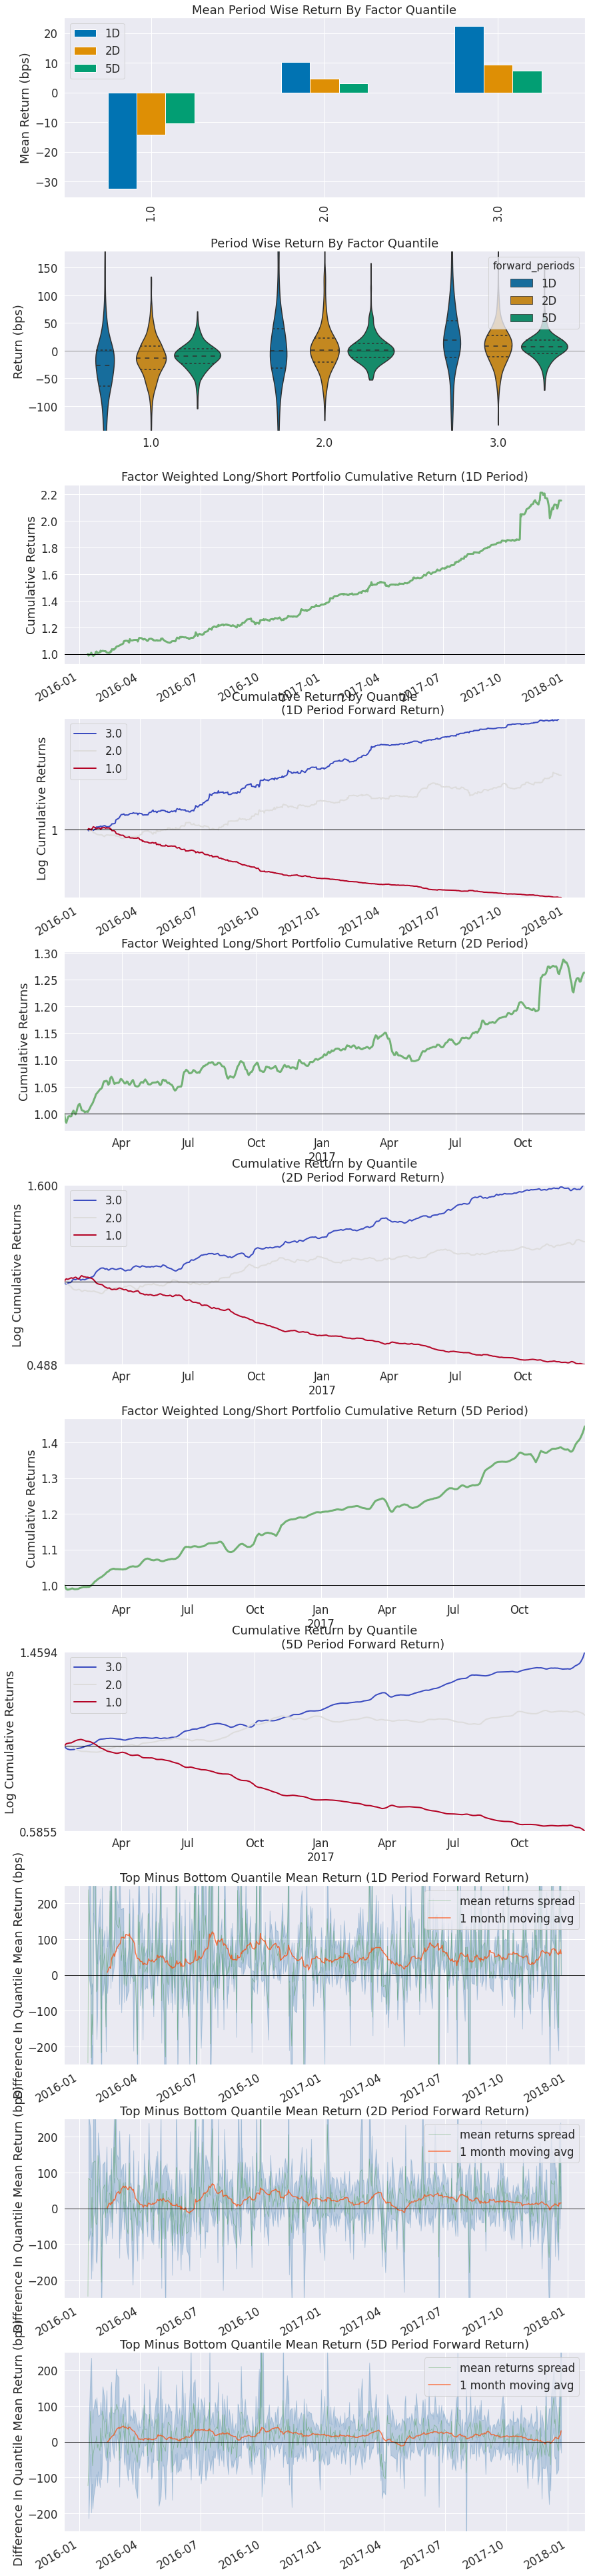

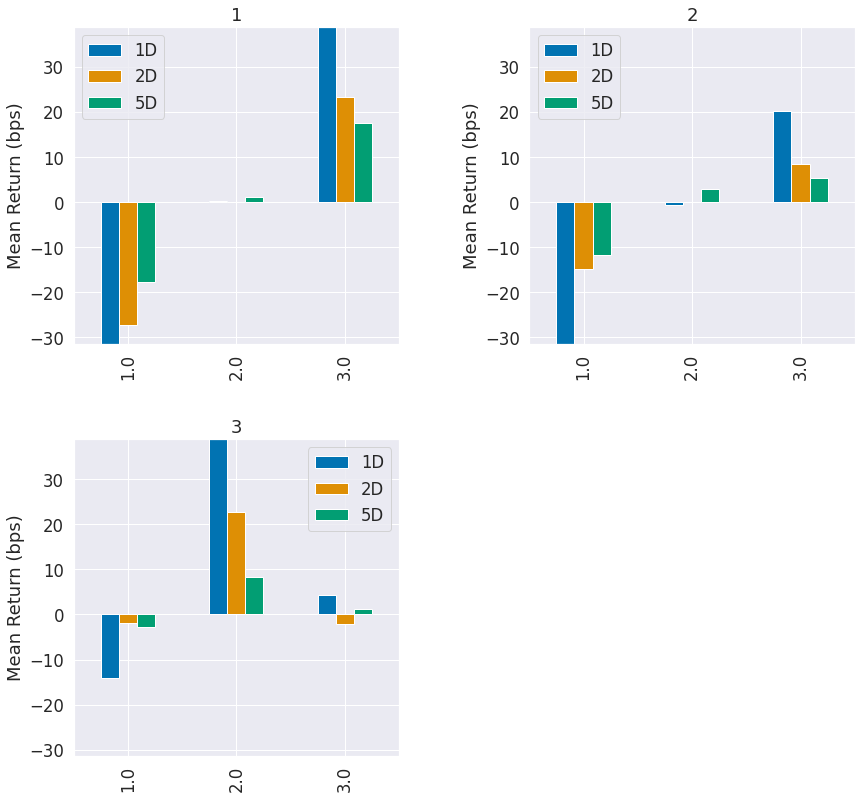

In [126]:
alphalens.tears.create_returns_tear_sheet(factor_data, by_group = True)

In [127]:
target

label
date       asset         
2017-11-03 4SI.JO    -1.0
2017-11-07 4SI.JO    -1.0
2017-11-08 4SI.JO     1.0
2017-11-13 4SI.JO     0.0
2017-11-20 4SI.JO     0.0
...                   ...
2017-12-04 ZPLP.JO    0.0
2017-12-07 ZPLP.JO    0.0
2017-12-14 ZPLP.JO    0.0
2017-12-15 ZPLP.JO    1.0
2017-12-18 ZPLP.JO    0.0

[51412 rows x 1 columns]

In [128]:
y = factor_data['factor_quantile'].map({1:-1, 2:0, 3:1})
y.name = 'quantile_prediction'
results = pd.concat([target, y], axis = 1).dropna()
results

label  quantile_prediction
date       asset                             
2016-01-14 ACG.JO   -1.0                  1.0
           GPL.JO   -1.0                 -1.0
2016-01-15 ACG.JO   -1.0                  0.0
           CND.JO   -1.0                 -1.0
           CTA.JO   -1.0                 -1.0
...                  ...                  ...
2017-12-22 TRL.JO    0.0                  1.0
           TWR.JO    1.0                  0.0
           VOD.JO    0.0                  1.0
           WEA.JO    1.0                  1.0
           WHL.JO    0.0                 -1.0

[50095 rows x 2 columns]

In [129]:
print(classification_report(results['label'], results['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.24      0.39      0.30     10234
         0.0       0.58      0.32      0.41     29209
         1.0       0.24      0.38      0.30     10652

    accuracy                           0.35     50095
   macro avg       0.35      0.37      0.34     50095
weighted avg       0.44      0.35      0.37     50095



In [130]:
X = pd.concat([results['quantile_prediction'], factor_data['factor']], axis = 1).dropna()[['factor']]
y = results['quantile_prediction']
y

date        asset 
2016-01-14  ACG.JO    1.0
            GPL.JO   -1.0
2016-01-15  ACG.JO    0.0
            CND.JO   -1.0
            CTA.JO   -1.0
                     ... 
2017-12-22  TRL.JO    1.0
            TWR.JO    0.0
            VOD.JO    1.0
            WEA.JO    1.0
            WHL.JO   -1.0
Name: quantile_prediction, Length: 50095, dtype: float64

In [131]:
n_classes = 3
multi_y = pd.DataFrame(
    label_binarize(
        y, 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = y.index)
multi_y

-1   0   1
date       asset             
2016-01-14 ACG.JO   0   0   1
           GPL.JO   1   0   0
2016-01-15 ACG.JO   0   1   0
           CND.JO   1   0   0
           CTA.JO   1   0   0
...                ..  ..  ..
2017-12-22 TRL.JO   0   0   1
           TWR.JO   0   1   0
           VOD.JO   0   0   1
           WEA.JO   0   0   1
           WHL.JO   1   0   0

[50095 rows x 3 columns]

In [132]:
clf = LogisticRegression()
model = OneVsRestClassifier(clf)
model.fit(X, multi_y)

OneVsRestClassifier(estimator=LogisticRegression())

In [133]:
probs = model.predict_proba(X)
probs = pd.DataFrame(
    probs, 
    index = multi_y.index, 
    columns = multi_y.columns)
probs

-1         0             1
date       asset                                   
2016-01-14 ACG.JO  0.044019  0.327036  3.585714e-01
           GPL.JO  0.091527  0.327025  1.936670e-01
2016-01-15 ACG.JO  0.009433  0.327056  7.537695e-01
           CND.JO  0.065541  0.327030  2.619977e-01
           CTA.JO  0.181212  0.327015  9.317661e-02
...                     ...       ...           ...
2017-12-22 TRL.JO  0.078868  0.327028  2.225597e-01
           TWR.JO  0.137696  0.327019  1.274963e-01
           VOD.JO  0.000025  0.327134  9.994614e-01
           WEA.JO  0.135755  0.327020  1.294830e-01
           WHL.JO  1.000000  0.326724  3.793734e-12

[50095 rows x 3 columns]

In [134]:
results['label']

date        asset 
2016-01-14  ACG.JO   -1.0
            GPL.JO   -1.0
2016-01-15  ACG.JO   -1.0
            CND.JO   -1.0
            CTA.JO   -1.0
                     ... 
2017-12-22  TRL.JO    0.0
            TWR.JO    1.0
            VOD.JO    0.0
            WEA.JO    1.0
            WHL.JO    0.0
Name: label, Length: 50095, dtype: float64

In [135]:
true_y = pd.DataFrame(
    label_binarize(
        results['label'], 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = results['label'].index)
true_y

-1   0   1
date       asset             
2016-01-14 ACG.JO   1   0   0
           GPL.JO   1   0   0
2016-01-15 ACG.JO   1   0   0
           CND.JO   1   0   0
           CTA.JO   1   0   0
...                ..  ..  ..
2017-12-22 TRL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   1   0
           WEA.JO   0   0   1
           WHL.JO   0   1   0

[50095 rows x 3 columns]

In [136]:
def plotROC(true_y, probabilities):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    classes = [-1, 0.0, 1]
    roc_auc = dict()
    for i, label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    for i, label in enumerate(classes):

    #     print(i)
        data = pd.DataFrame({'FPR':fpr[i], 'TPR':tpr[i], 'roc':roc_auc[i]})
        line_data = pd.DataFrame({'x':[0, 1], 'y':[0, 1]})

        g = sns.lineplot(data = line_data, x = 'x', y = 'y',ax = axes[i], legend = None, color = 'black')
        g = data.plot(x = 'FPR', y = 'TPR', ax = axes[i], kind = 'line', legend = None)

        g.lines[0].set_linestyle("--")
        g.set_ylabel('TPR')
        if label == 1:
            g.set_title(f"Long \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == -1:
            g.set_title(f"Short \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == 0:
            g.set_title(f"Neutral \n \n AUC = {round(roc_auc[i], 2)}")
    plt.show()

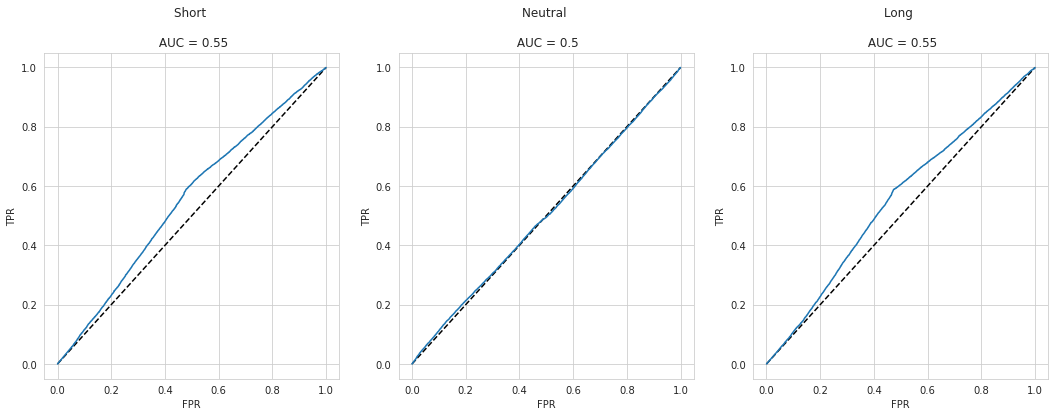

In [137]:
plotROC(true_y, probs)

In [138]:
train = pd.concat([factor_data[['factor', 'group']], target], axis = 1).dropna()
train['label'] = train['label'].astype('object')
train['group'] = train['group'].astype('object')
train

factor group label
date       asset                        
2016-01-14 ACG.JO   0.709083     1    -1
           GPL.JO   0.256932     2    -1
2016-01-15 ACG.JO   1.619174     2    -1
           CND.JO   0.466069     1    -1
           CTA.JO  -0.197524     2    -1
...                      ...   ...   ...
2017-12-22 TRL.JO   0.350889     1     0
           TWR.JO  -0.009033     1     1
           VOD.JO   5.048420     3     0
           WEA.JO   0.000462     3     1
           WHL.JO -13.054819     3     0

[50095 rows x 3 columns]

In [139]:
train['label'].value_counts()

 0.0    29209
 1.0    10652
-1.0    10234
Name: label, dtype: int64

(-250.0, 250.0)

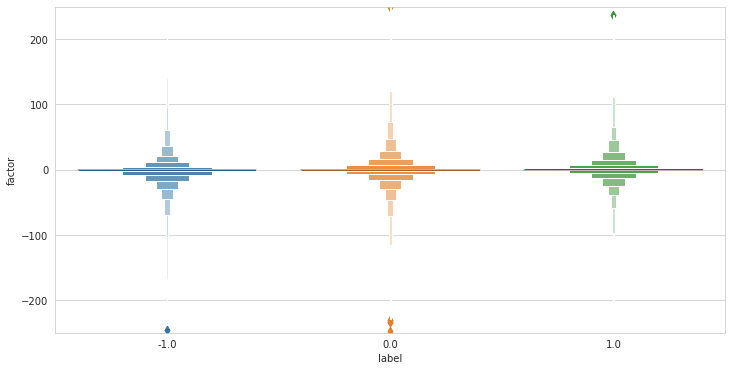

In [140]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor')
g.set_ylim(-250, 250)

(-250.0, 250.0)

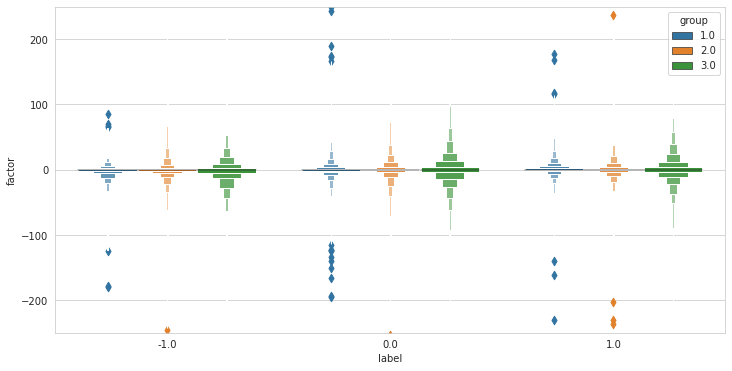

In [141]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'factor', hue = 'group')
g.set_ylim(-250, 250)

#### Perfomance evaluation

In [142]:
train['label'] = train['label'].astype('int')
train['group'] = train['group'].astype('int')
X = train[['factor', 'group']]
y = train['label'].astype('int')

In [143]:
def upsamplingCV(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    kf = KFold(n_splits = cv)
    for train_index, test_index in kf.split(X, y):

        train_X = X.iloc[train_index, ]
        train_y = y.iloc[train_index]

        test_X = X.iloc[test_index, ]
        test_y = y.iloc[test_index]

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']


        n_classes = 3
        upsampled_y = pd.DataFrame(label_binarize(
            upsampled_y, 
            classes = [-1, 0, 1]),
            index = upsampled_y.index,
            columns = [-1, 0, 1])

        model = OneVsRestClassifier(clf)
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = model.predict_proba(test_X)
        probs = pd.DataFrame(
            probs, 
            index = test_y.index, 
            columns = upsampled_y.columns)


        probabilities = pd.concat(
            [probabilities, probs])

    return probabilities

In [144]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [145]:
def convertToMultiClass(y):
    classes = [-1, 0, 1]
    transformed_y = pd.DataFrame(label_binarize(
        y, 
        classes = classes),
        index = y.index,
        columns = [-1, 0, 1])
    return transformed_y

In [146]:
true_y = convertToMultiClass(y)

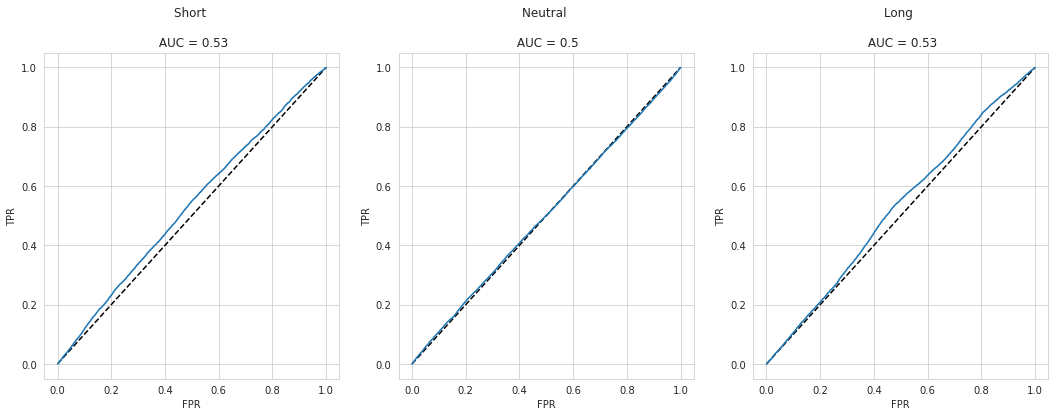

In [147]:
plotROC(true_y, probabilities)

### Bollinger Bands

In [148]:
data = cusumTrainPrices['WHL.JO'].copy()
close = data['close']
n = 12
data['movav'] = ta.trend.sma(close, periods = n)
data['upper'] = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
data['lower'] = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

data['perc_b'] = (close - data['lower'])/(data['upper'] - data['lower'])

data['mfi'] = ta.volume.MFIIndicator(
    data['high'], data['low'], close, data['volume'], n = n)\
    .money_flow_index()

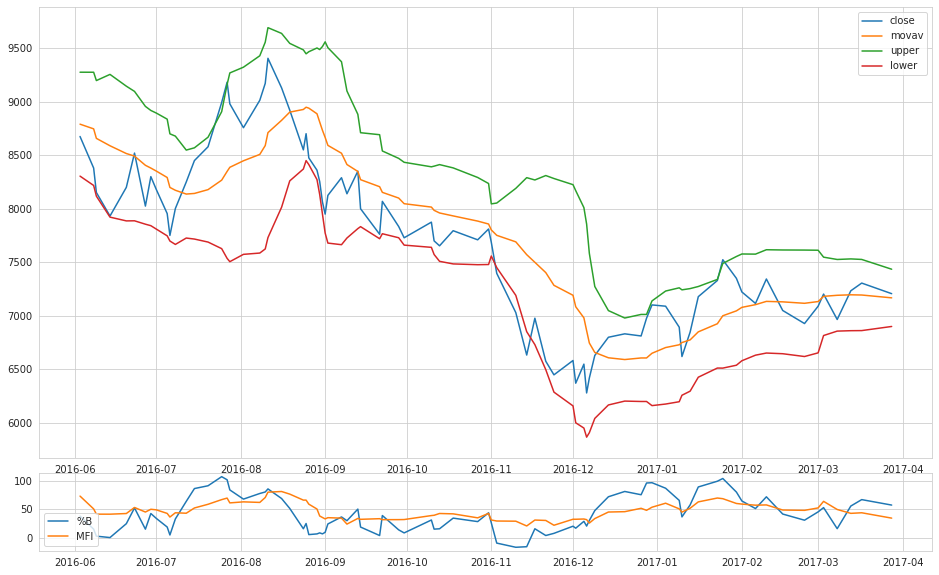

In [149]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

data = data.loc[datetime(2016, 6, 1):datetime(2017, 3, 28)]

ax1.plot(data.index, data['close'])
ax1.plot(data.index, data['movav'])
ax1.plot(data.index, data['upper'])
ax1.plot(data.index, data['lower'])
ax1.legend(('close', 'movav', 'upper', 'lower', ))
ax1.set_xticklabels(' ')

ax2.plot(data.index, data['perc_b'] * 100)
ax2.plot(data.index, data['mfi'])
# ax2.plot(data.index, data['signal'])
# ax2.plot(data.index, data['signal'].diff())
# ax2.plot(data.index, list(itertools.repeat(0, len(data.index))), linestyle = 'dashed')
ax2.legend(('%B', 'MFI', ), loc = 'lower left')

In [150]:
%time
bbands_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
#         data['movav'] = ta.trend.sma(close, periods = n)
        upper = ta.volatility.bollinger_hband(close, n = n, ndev = 2)
        lower = ta.volatility.bollinger_lband(close, n = n, ndev = 2)

        perc_b = (close - lower)/(upper - lower) * -1
        perc_b.name = 'perc_b'

        out = pd.DataFrame(perc_b)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        bbands_data = pd.concat([bbands_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [151]:
bbands_data

perc_b
Date       symbol           
2017-10-24 4SI.JO        NaN
2017-10-27 4SI.JO        NaN
2017-11-03 4SI.JO        NaN
2017-11-07 4SI.JO        NaN
2017-11-08 4SI.JO        NaN
...                      ...
2017-12-07 ZPLP.JO -0.641433
2017-12-14 ZPLP.JO -0.290697
2017-12-15 ZPLP.JO -0.798945
2017-12-18 ZPLP.JO -1.154887
2017-12-20 ZPLP.JO -1.105009

[53262 rows x 1 columns]

In [152]:
bbands_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = bbands_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
bbands_factor_data

Dropped 7.8% entries from factor data: 7.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                           
2017-12-04 4SI.JO   0.081081  0.081081  0.081081 -0.277019              2.0
2017-12-05 4SI.JO   0.000000  0.000000 -0.060000 -0.429174              2.0
2017-12-12 4SI.JO   0.000000 -0.095745 -0.042553 -0.335826              2.0
2017-12-14 4SI.JO   0.117647  0.117647  0.000000 -0.109378              3.0
2017-12-15 4SI.JO   0.000000 -0.052632 -0.105263 -0.472524              2.0
...                      ...       ...       ...       ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101 -0.641433              1.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645 -0.290697              2.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832 -0.798945              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -1.154887              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -1.105009              1.0

[49111 rows x 5 columns]

In [153]:
%time
mfi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 12
        
        mfi = ta.volume.MFIIndicator(
            data['high'], data['low'], close, data['volume'], n = n)\
            .money_flow_index()
        mfi.name = 'mfi'

        out = pd.DataFrame(mfi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        mfi_data = pd.concat([mfi_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [154]:
# bbands_factor_data.drop('group', axis = 1, inplace = True)

In [155]:
bbands_factor_data = createGroupingFactor(
    bbands_factor_data, 
    group_data = mfi_data, 
    prices_data = prices_data, 
    num_groupes = 2)
bbands_factor_data

Dropped 7.4% entries from factor data: 7.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile  \
date       asset                                                             
2016-02-01 ADH.JO  0.000000  0.000000 -0.021429 -0.474284              2.0   
           AVV.JO  0.000000  0.028999  0.075772 -0.465989              3.0   
           BAT.JO -0.033846 -0.033846 -0.050653 -1.093762              1.0   
           CLS.JO -0.026484 -0.026484  0.000000 -0.882483              1.0   
           OMN.JO -0.041343  0.000251  0.000251 -0.351563              3.0   
...                     ...       ...       ...       ...              ...   
2017-12-22 TRL.JO  0.000000  0.000000  0.028571 -0.519587              2.0   
           TWR.JO  0.000000  0.000000  0.022222 -0.185444              3.0   
           VOD.JO  0.000000  0.000000  0.034020 -0.247161              3.0   
           WEA.JO  0.000000  0.000000  0.333333 -0.167047              3.0   
           WHL.JO  0.000000  0.000000  0.024472 -0.982370              1.0   

                   group  
date       asset          
2016-02-01 ADH.JO    1.0  
           AVV.JO    2.0  
           BAT.JO    2.0  
           CLS.JO    2.0  
           OMN.JO    1.0  
...                  ...  
2017-12-22 TRL.JO    1.0  
           TWR.JO    1.0  
           VOD.JO    1.0  
           WEA.JO    2.0  
           WHL.JO    2.0  

[49059 rows x 6 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      1.695   0.666   0.433
beta                                            0.431   0.177   0.167
Mean Period Wise Return Top Quantile (bps)     52.616  25.535  16.425
Mean Period Wise Return Bottom Quantile (bps) -36.855 -17.131 -12.829
Mean Period Wise Spread (bps)                  89.470  42.622  29.240

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

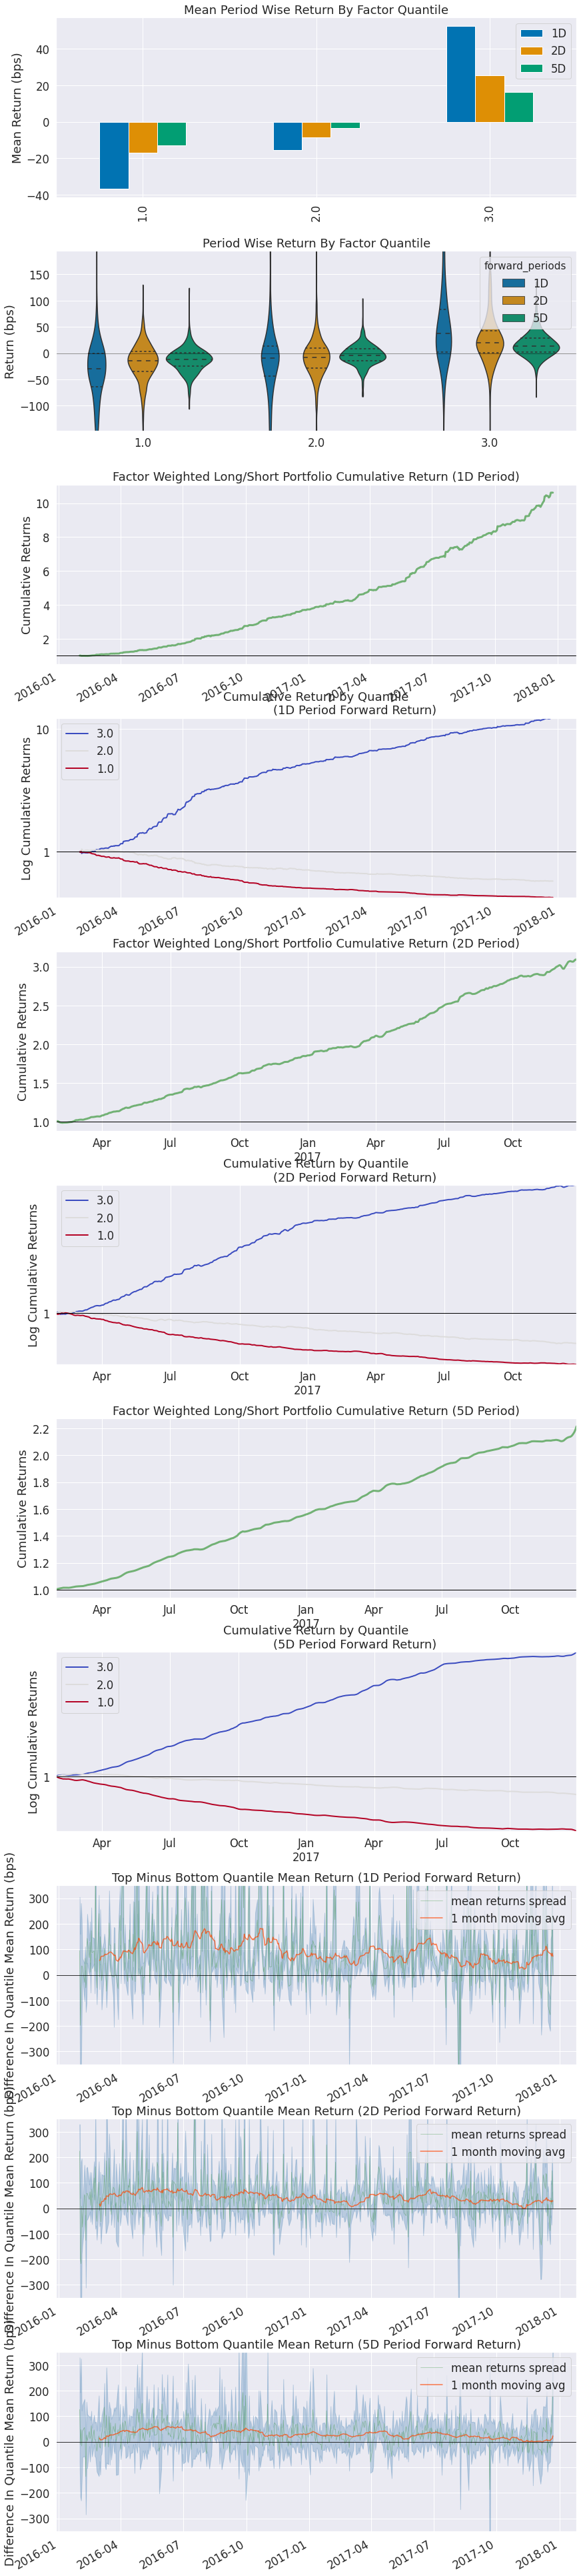

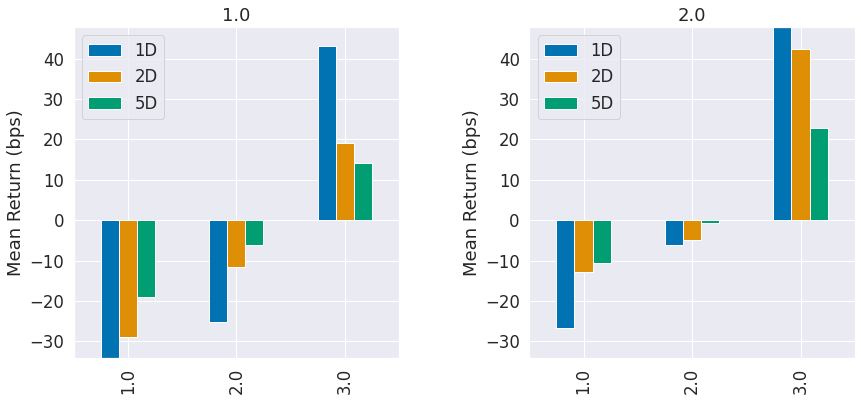

In [156]:
alphalens.tears.create_returns_tear_sheet(bbands_factor_data, by_group = True)

In [157]:
mfi = pd.concat([bbands_factor_data['group'], mfi_data], axis = 1).dropna()
mfi.groupby('group').mean()

mfi
group           
1.0    32.685134
2.0    71.403959

In [158]:
y = bbands_factor_data['factor_quantile'].map({1:-1, 2:0, 3:1})
y.name = 'quantile_prediction'
results = pd.concat([target, y], axis = 1).dropna()
results

label  quantile_prediction
date       asset                             
2016-02-01 ADH.JO    0.0                  0.0
           AVV.JO    0.0                  1.0
           BAT.JO   -1.0                 -1.0
           CLS.JO   -1.0                 -1.0
           OMN.JO   -1.0                  1.0
...                  ...                  ...
2017-12-22 TRL.JO    0.0                  0.0
           TWR.JO    1.0                  1.0
           VOD.JO    0.0                  1.0
           WEA.JO    1.0                  1.0
           WHL.JO    0.0                 -1.0

[48344 rows x 2 columns]

In [159]:
print(classification_report(results['label'], results['quantile_prediction']))

              precision    recall  f1-score   support

        -1.0       0.25      0.41      0.31      9889
         0.0       0.64      0.36      0.46     28237
         1.0       0.28      0.45      0.35     10218

    accuracy                           0.39     48344
   macro avg       0.39      0.41      0.37     48344
weighted avg       0.48      0.39      0.41     48344



In [160]:
bbands = bbands_factor_data['factor']
bbands.name = 'bbands'

In [161]:
X = pd.concat([results['quantile_prediction'], bbands], axis = 1).dropna()[['bbands']]
y = results['quantile_prediction']
y

date        asset 
2016-02-01  ADH.JO    0.0
            AVV.JO    1.0
            BAT.JO   -1.0
            CLS.JO   -1.0
            OMN.JO    1.0
                     ... 
2017-12-22  TRL.JO    0.0
            TWR.JO    1.0
            VOD.JO    1.0
            WEA.JO    1.0
            WHL.JO   -1.0
Name: quantile_prediction, Length: 48344, dtype: float64

In [162]:
n_classes = 3
multi_y = pd.DataFrame(
    label_binarize(
        y, 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = y.index)
multi_y

-1   0   1
date       asset             
2016-02-01 ADH.JO   0   1   0
           AVV.JO   0   0   1
           BAT.JO   1   0   0
           CLS.JO   1   0   0
           OMN.JO   0   0   1
...                ..  ..  ..
2017-12-22 TRL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   0   1
           WEA.JO   0   0   1
           WHL.JO   1   0   0

[48344 rows x 3 columns]

In [163]:
clf = LogisticRegression()
model = OneVsRestClassifier(clf)
model.fit(X, multi_y)

OneVsRestClassifier(estimator=LogisticRegression())

In [164]:
probs = model.predict_proba(X)
probs = pd.DataFrame(
    probs, 
    index = multi_y.index, 
    columns = multi_y.columns)
probs

-1         0         1
date       asset                               
2016-02-01 ADH.JO  0.051821  0.331214  0.118209
           AVV.JO  0.046154  0.331294  0.131481
           BAT.JO  0.997948  0.325326  0.000015
           CLS.JO  0.956293  0.327328  0.000338
           OMN.JO  0.008940  0.332387  0.447448
...                     ...       ...       ...
2017-12-22 TRL.JO  0.096067  0.330782  0.064559
           TWR.JO  0.000787  0.333978  0.902344
           VOD.JO  0.001944  0.333387  0.789025
           WEA.JO  0.000601  0.334155  0.923661
           WHL.JO  0.989563  0.326381  0.000078

[48344 rows x 3 columns]

In [165]:
true_y = pd.DataFrame(
    label_binarize(
        results['label'], 
        classes = [-1, 0, 1]), 
    columns = [-1, 0, 1], 
    index = results['label'].index)
true_y

-1   0   1
date       asset             
2016-02-01 ADH.JO   0   1   0
           AVV.JO   0   1   0
           BAT.JO   1   0   0
           CLS.JO   1   0   0
           OMN.JO   1   0   0
...                ..  ..  ..
2017-12-22 TRL.JO   0   1   0
           TWR.JO   0   0   1
           VOD.JO   0   1   0
           WEA.JO   0   0   1
           WHL.JO   0   1   0

[48344 rows x 3 columns]

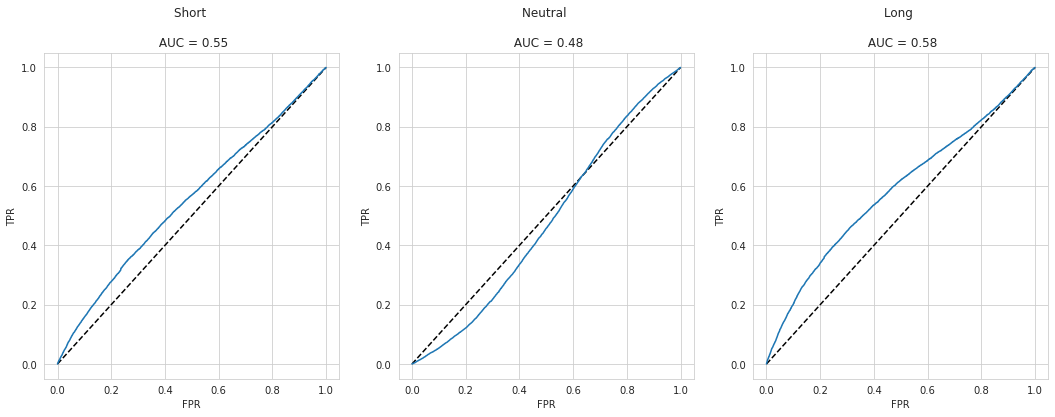

In [166]:
plotROC(true_y, probs)

In [167]:
train.rename(columns = {'group':'volume_group', 'factor':'macd'}, inplace = True)
train

macd  volume_group  label
date       asset                                 
2016-01-14 ACG.JO   0.709083             1     -1
           GPL.JO   0.256932             2     -1
2016-01-15 ACG.JO   1.619174             2     -1
           CND.JO   0.466069             1     -1
           CTA.JO  -0.197524             2     -1
...                      ...           ...    ...
2017-12-22 TRL.JO   0.350889             1      0
           TWR.JO  -0.009033             1      1
           VOD.JO   5.048420             3      0
           WEA.JO   0.000462             3      1
           WHL.JO -13.054819             3      0

[50095 rows x 3 columns]

In [168]:
# train.drop(['bbands', 'mfi_group'], axis = 1, inplace = True)

In [169]:
bb_factor = bbands_factor_data['factor']
bb_factor.name = 'bbands'
bb_mfi_group = bbands_factor_data['group']
bb_mfi_group.name = 'mfi_group'
train = pd.concat([train, bb_factor, bb_mfi_group], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group
date       asset                                                      
2016-02-01 ADH.JO  -1.741487           3.0    0.0 -0.474284        1.0
           AVV.JO  -3.960234           3.0    0.0 -0.465989        2.0
           BAT.JO -35.595632           3.0   -1.0 -1.093762        2.0
           CLS.JO -15.698344           3.0   -1.0 -0.882483        2.0
           OMN.JO  -6.508767           2.0   -1.0 -0.351563        1.0
...                      ...           ...    ...       ...        ...
2017-12-22 TRL.JO   0.350889           1.0    0.0 -0.519587        1.0
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0
           WEA.JO   0.000462           3.0    1.0 -0.167047        2.0
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0

[48344 rows x 5 columns]

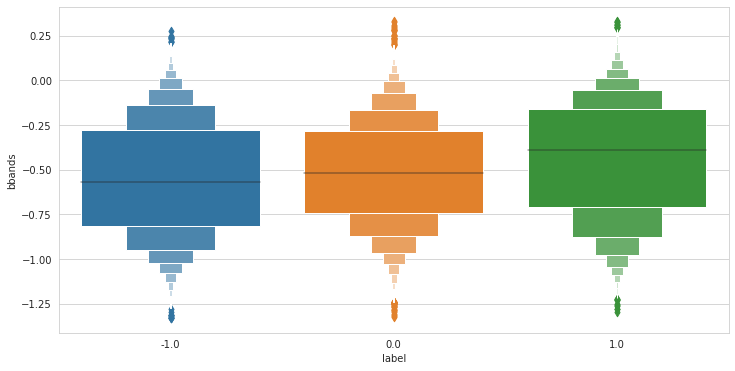

In [170]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands')

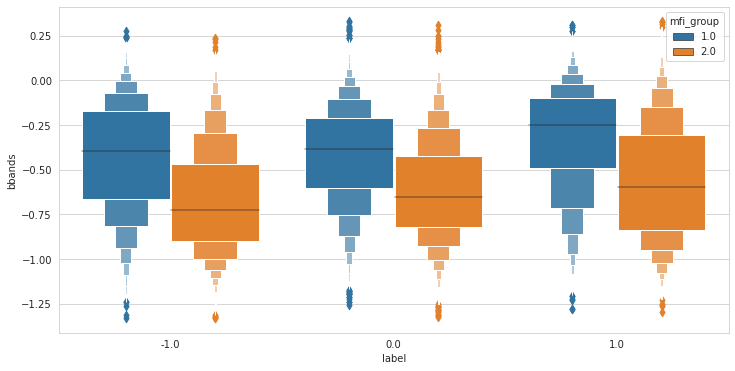

In [171]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'bbands', hue = 'mfi_group')

#### Perfomance evaluation

In [172]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group']]
y = train['label'].astype('int')

In [173]:
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [174]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands  volume_group_2.0  volume_group_3.0  \
date       asset                                                             
2016-02-01 ADH.JO  -1.741487 -0.474284                 0                 1   
           AVV.JO  -3.960234 -0.465989                 0                 1   
           BAT.JO -35.595632 -1.093762                 0                 1   
           CLS.JO -15.698344 -0.882483                 0                 1   
           OMN.JO  -6.508767 -0.351563                 1                 0   
...                      ...       ...               ...               ...   
2017-12-22 TRL.JO   0.350889 -0.519587                 0                 0   
           TWR.JO  -0.009033 -0.185444                 0                 0   
           VOD.JO   5.048420 -0.247161                 0                 1   
           WEA.JO   0.000462 -0.167047                 0                 1   
           WHL.JO -13.054819 -0.982370                 0                 1   

                   mfi_group_2.0  
date       asset                  
2016-02-01 ADH.JO              0  
           AVV.JO              1  
           BAT.JO              1  
           CLS.JO              1  
           OMN.JO              0  
...                          ...  
2017-12-22 TRL.JO              0  
           TWR.JO              0  
           VOD.JO              0  
           WEA.JO              1  
           WHL.JO              1  

[48344 rows x 5 columns]

In [175]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y, 
    cv = 10)

In [176]:
true_y = convertToMultiClass(y)

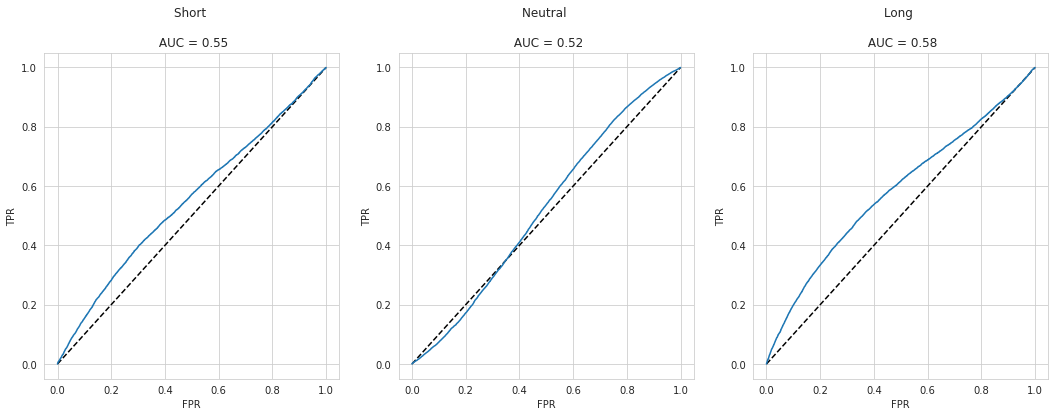

In [177]:
plotROC(true_y, probabilities)

### Residual Strength Index

In [178]:
%time
rsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        n = 5
        rsi = ta.momentum.RSIIndicator(data['close'], n = n).rsi() * -1
        rsi.name = 'rsi'

        out = pd.DataFrame(rsi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        rsi_data = pd.concat([rsi_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [179]:
rsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = rsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
rsi_factor_data

Dropped 3.3% entries from factor data: 3.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-11-08 4SI.JO   0.000000  0.000000  0.151351  -0.000000              3.0
2017-11-13 4SI.JO   0.000000  0.000000 -0.065728 -30.455969              3.0
2017-11-20 4SI.JO  -0.070352  0.030151 -0.100503 -25.585730              3.0
2017-11-21 4SI.JO   0.108108  0.108108  0.059459 -21.323423              3.0
2017-11-22 4SI.JO   0.000000  0.000000 -0.043902 -39.362049              2.0
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101 -56.428701              1.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645 -44.671217              2.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832 -56.103945              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -68.772640              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -74.201696              1.0

[51511 rows x 5 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      1.184   0.450   0.341
beta                                            0.387   0.212   0.115
Mean Period Wise Return Top Quantile (bps)     46.550  23.893  14.524
Mean Period Wise Return Bottom Quantile (bps) -34.074 -15.012 -10.394
Mean Period Wise Spread (bps)                  80.624  38.883  24.924

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

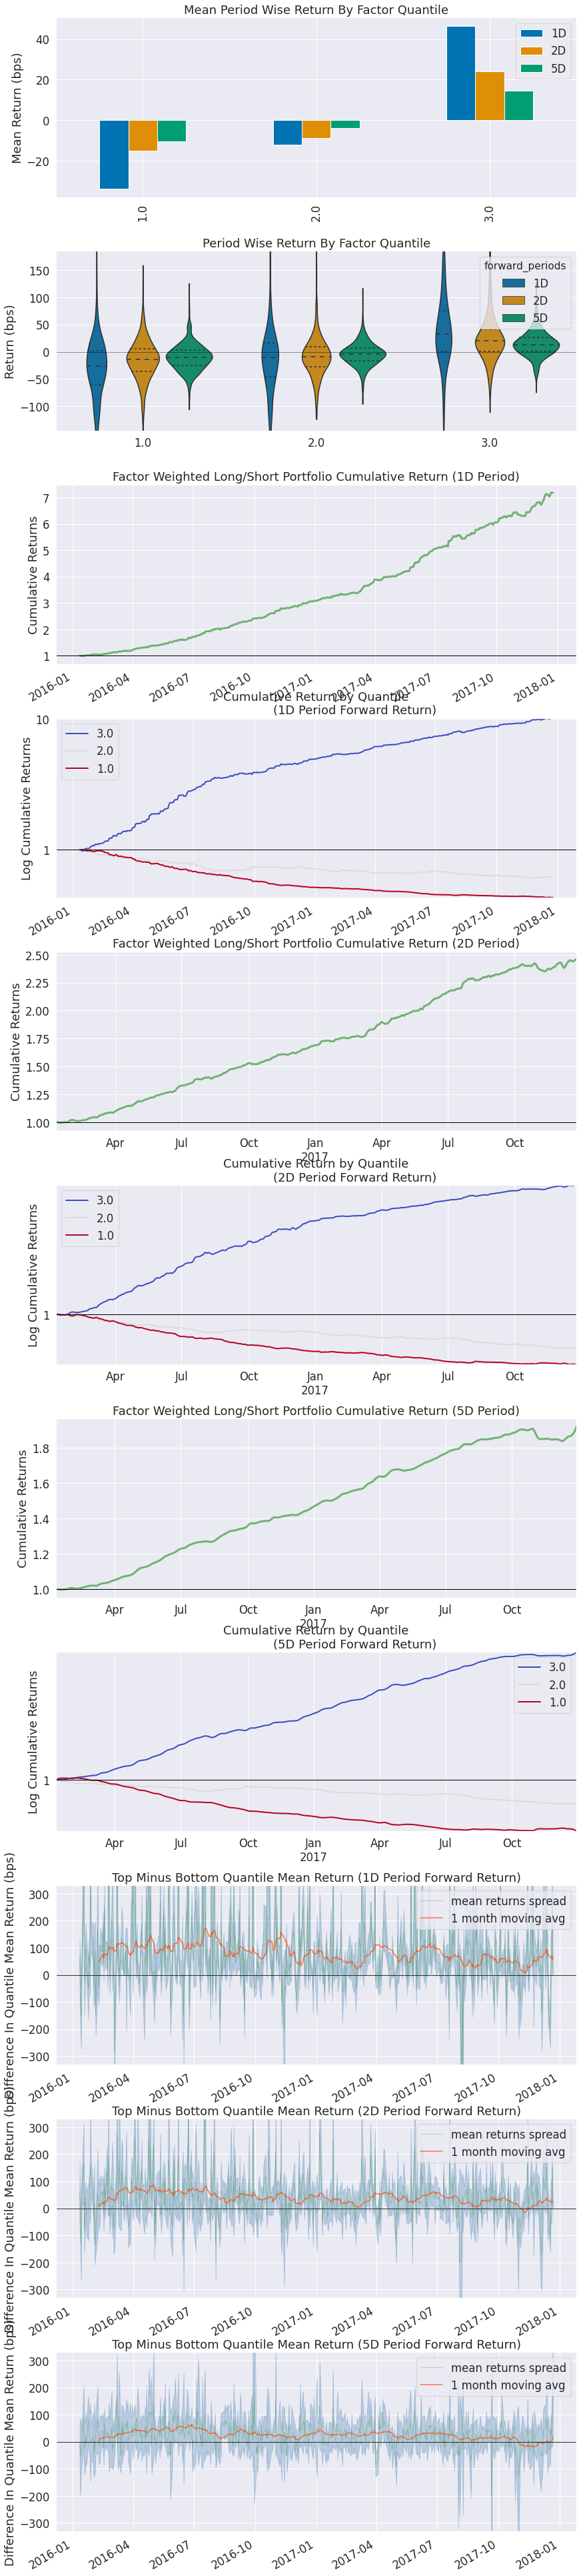

In [180]:
alphalens.tears.create_returns_tear_sheet(rsi_factor_data)

In [181]:
rsi = rsi_factor_data['factor']
rsi.name = 'rsi'
train = pd.concat([train, rsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                         
2016-02-01 ADH.JO  -1.741487           3.0    0.0 -0.474284        1.0   
           AVV.JO  -3.960234           3.0    0.0 -0.465989        2.0   
           BAT.JO -35.595632           3.0   -1.0 -1.093762        2.0   
           CLS.JO -15.698344           3.0   -1.0 -0.882483        2.0   
           OMN.JO  -6.508767           2.0   -1.0 -0.351563        1.0   
...                      ...           ...    ...       ...        ...   
2017-12-22 TRL.JO   0.350889           1.0    0.0 -0.519587        1.0   
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0   
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0   
           WEA.JO   0.000462           3.0    1.0 -0.167047        2.0   
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0   

                         rsi  
date       asset              
2016-02-01 ADH.JO -52.316489  
           AVV.JO -53.676714  
           BAT.JO -80.516063  
           CLS.JO -72.070849  
           OMN.JO -44.564741  
...                      ...  
2017-12-22 TRL.JO -48.090673  
           TWR.JO -36.970545  
           VOD.JO -40.347338  
           WEA.JO -40.782919  
           WHL.JO -75.524993  

[48344 rows x 6 columns]

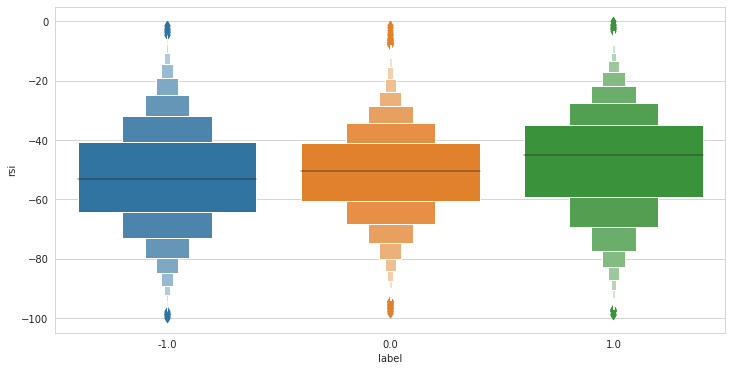

In [182]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'rsi')

In [183]:
%time
tsi_data = pd.DataFrame()
for i, (symbol, data) in enumerate(cusumTrainPrices.items()):
    if len(data) > 12:
        data = data.copy()
        close = data['close']
        
        tsi = ta.momentum.TSIIndicator(data['close'], r = 9, s = 5).tsi() * -1
        tsi.name = 'tsi'

        out = pd.DataFrame(tsi)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        tsi_data = pd.concat([tsi_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [184]:
tsi_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = tsi_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
tsi_factor_data

Dropped 9.1% entries from factor data: 9.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                            
2017-12-12 4SI.JO   0.000000 -0.095745 -0.042553  32.026456              3.0
2017-12-14 4SI.JO   0.117647  0.117647  0.000000  35.028004              3.0
2017-12-15 4SI.JO   0.000000 -0.052632 -0.105263  27.065970              2.0
2017-12-19 4SI.JO  -0.055556 -0.055556 -0.005556  25.285173              3.0
2017-12-20 4SI.JO   0.000000  0.000000  0.052941  27.173452              2.0
...                      ...       ...       ...        ...              ...
2017-12-07 ZPLP.JO  0.000000  0.000000 -0.032101  -5.499087              1.0
2017-12-14 ZPLP.JO  0.033165  0.085258  0.115645   0.176292              2.0
2017-12-15 ZPLP.JO  0.050420  0.050420  0.079832  -4.120593              1.0
2017-12-18 ZPLP.JO  0.000000  0.028000  0.028000 -16.460770              1.0
2017-12-20 ZPLP.JO  0.000000  0.000000  0.000000 -27.611001              1.0

[48427 rows x 5 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                      0.382   0.177   0.174
beta                                            0.174   0.065   0.008
Mean Period Wise Return Top Quantile (bps)     15.639   8.899   5.975
Mean Period Wise Return Bottom Quantile (bps) -16.731  -8.020  -6.702
Mean Period Wise Spread (bps)                  32.371  16.898  12.675

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

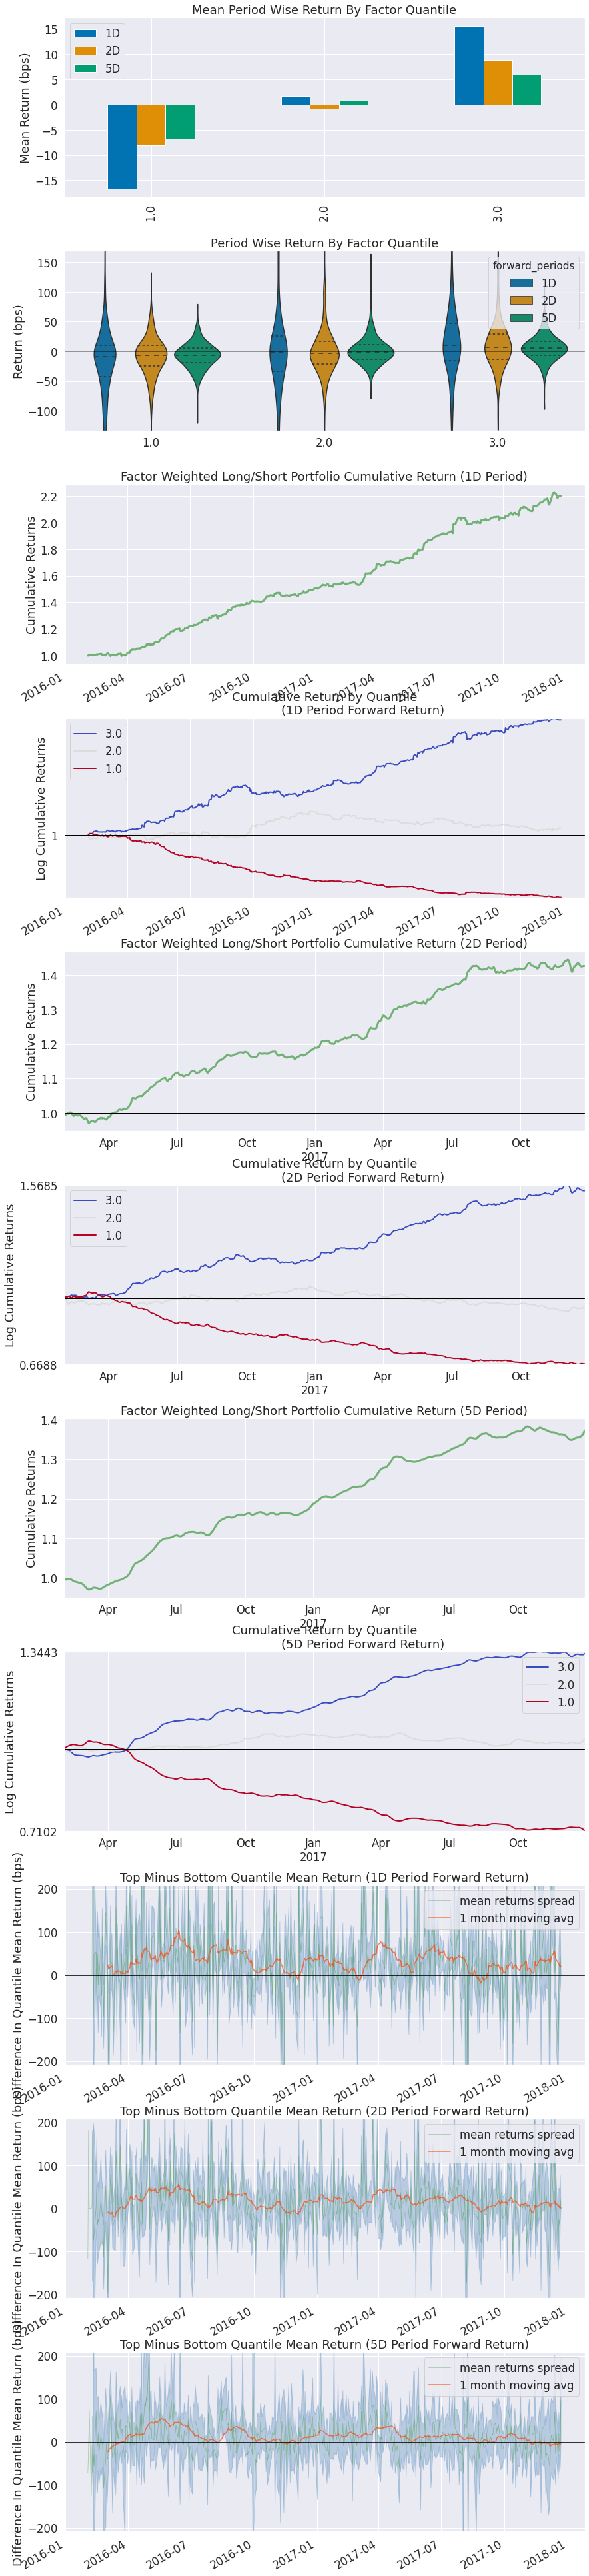

In [185]:
alphalens.tears.create_returns_tear_sheet(tsi_factor_data)

In [186]:
tsi = tsi_factor_data['factor']
tsi.name = 'tsi'
train = pd.concat([train, tsi], axis = 1).dropna()
train

macd  volume_group  label    bbands  mfi_group  \
date       asset                                                         
2016-02-03 OMN.JO  -9.651788           2.0    0.0 -0.475502        1.0   
           VOD.JO -11.997311           3.0    1.0 -0.863987        1.0   
2016-02-04 AVV.JO  -4.367894           2.0    0.0 -0.874330        2.0   
           BAT.JO  -6.022800           3.0   -1.0 -0.929673        2.0   
           CLS.JO -16.817511           3.0   -1.0 -1.063141        2.0   
...                      ...           ...    ...       ...        ...   
2017-12-22 TRL.JO   0.350889           1.0    0.0 -0.519587        1.0   
           TWR.JO  -0.009033           1.0    1.0 -0.185444        1.0   
           VOD.JO   5.048420           3.0    0.0 -0.247161        1.0   
           WEA.JO   0.000462           3.0    1.0 -0.167047        2.0   
           WHL.JO -13.054819           3.0    0.0 -0.982370        2.0   

                         rsi        tsi  
date       asset                         
2016-02-03 OMN.JO -50.839385  27.252659  
           VOD.JO -62.651383   6.041764  
2016-02-04 AVV.JO -70.522019  -2.290972  
           BAT.JO -68.659063 -15.717312  
           CLS.JO -73.886887 -20.563557  
...                      ...        ...  
2017-12-22 TRL.JO -48.090673  -0.624315  
           TWR.JO -36.970545  23.836660  
           VOD.JO -40.347338  12.929797  
           WEA.JO -40.782919  12.805116  
           WHL.JO -75.524993 -31.404694  

[47671 rows x 7 columns]

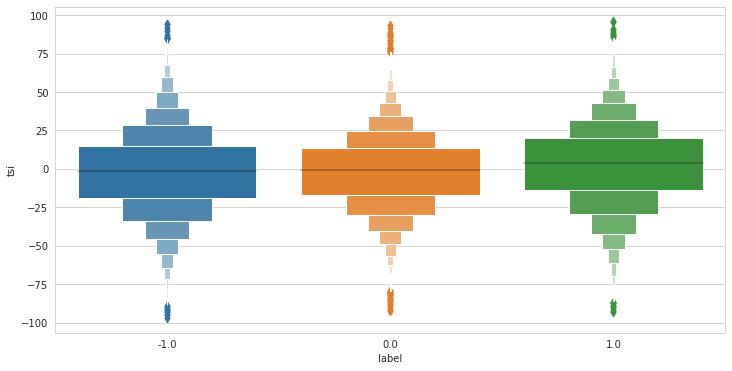

In [187]:
fig = plt.figure(figsize = (12, 6))
g = sns.boxenplot(data = train, x = 'label', y = 'tsi')

#### Perfomance evaluation

In [188]:
X = train[['macd', 'volume_group', 'bbands', 'mfi_group', 'rsi', 'tsi']]
y = train['label'].astype('int')
X.loc[:, 'volume_group'] = X.loc[:, 'volume_group'].astype('object')
X.loc[:, 'mfi_group'] = X.loc[:, 'mfi_group'].astype('object')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [189]:
X = pd.get_dummies(X, drop_first = True)
X

macd    bbands        rsi        tsi  \
date       asset                                               
2016-02-03 OMN.JO  -9.651788 -0.475502 -50.839385  27.252659   
           VOD.JO -11.997311 -0.863987 -62.651383   6.041764   
2016-02-04 AVV.JO  -4.367894 -0.874330 -70.522019  -2.290972   
           BAT.JO  -6.022800 -0.929673 -68.659063 -15.717312   
           CLS.JO -16.817511 -1.063141 -73.886887 -20.563557   
...                      ...       ...        ...        ...   
2017-12-22 TRL.JO   0.350889 -0.519587 -48.090673  -0.624315   
           TWR.JO  -0.009033 -0.185444 -36.970545  23.836660   
           VOD.JO   5.048420 -0.247161 -40.347338  12.929797   
           WEA.JO   0.000462 -0.167047 -40.782919  12.805116   
           WHL.JO -13.054819 -0.982370 -75.524993 -31.404694   

                   volume_group_2.0  volume_group_3.0  mfi_group_2.0  
date       asset                                                      
2016-02-03 OMN.JO                 1                 0              0  
           VOD.JO                 0                 1              0  
2016-02-04 AVV.JO                 1                 0              1  
           BAT.JO                 0                 1              1  
           CLS.JO                 0                 1              1  
...                             ...               ...            ...  
2017-12-22 TRL.JO                 0                 0              0  
           TWR.JO                 0                 0              0  
           VOD.JO                 0                 1              0  
           WEA.JO                 0                 1              1  
           WHL.JO                 0                 1              1  

[47671 rows x 7 columns]

In [195]:
probabilities = upsamplingCV(
    clf = LogisticRegression(
        random_state = 42), 
    X = X, 
    y = y,
    cv = 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

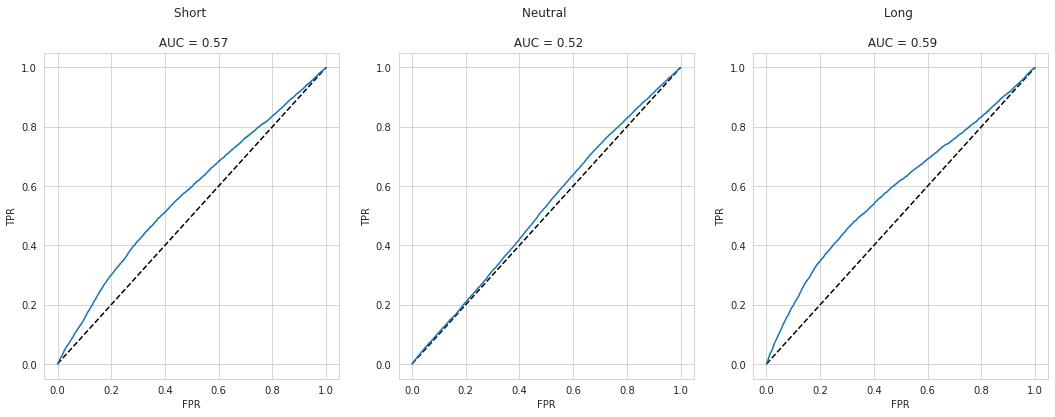

In [196]:
plotROC(true_y, probabilities)

## Alpha Combination

In [205]:
def modelFit(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    kf = KFold(n_splits = cv)
    for train_index, test_index in kf.split(X, y):

        train_X = X.iloc[train_index, ]
        train_y = y.iloc[train_index]

        test_X = X.iloc[test_index, ]
        test_y = y.iloc[test_index]

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']

        model = clf
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        probs = pd.DataFrame(
            model.predict_proba(test_X), 
            columns = model.classes_, 
            index = test_X.index)

        probabilities = pd.concat(
            [probabilities, probs])
        
        preds = pd.DataFrame(
            model.predict(test_X), 
            columns = ['predictions'], 
            index = test_X.index)
        preds['actual'] = test_y

        predictions = pd.concat(
            [predictions, preds])

    return predictions, probabilities

In [249]:
clf = LogisticRegression()
predictions, probabilities = modelFit(clf, X, y, cv = 10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [250]:
predictions

predictions  actual
date       asset                      
2016-02-03 OMN.JO           -1       0
           VOD.JO           -1       1
2016-02-04 AVV.JO           -1       0
           BAT.JO           -1      -1
           CLS.JO           -1      -1
...                        ...     ...
2017-12-22 TRL.JO            0       0
           TWR.JO            1       1
           VOD.JO            1       0
           WEA.JO            1       1
           WHL.JO           -1       0

[47671 rows x 2 columns]

In [251]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

          -1       0.25      0.50      0.33      9756
           0       0.64      0.17      0.26     27817
           1       0.27      0.54      0.36     10098

    accuracy                           0.31     47671
   macro avg       0.38      0.40      0.32     47671
weighted avg       0.48      0.31      0.30     47671



In [252]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'

In [253]:
probabilities

-1         0         1
date       asset                               
2016-02-03 OMN.JO  0.439653  0.307804  0.252543
           VOD.JO  0.489138  0.314936  0.195927
2016-02-04 AVV.JO  0.496581  0.319512  0.183907
           BAT.JO  0.437772  0.345313  0.216915
           CLS.JO  0.466188  0.339877  0.193935
...                     ...       ...       ...
2017-12-22 TRL.JO  0.331822  0.338598  0.329581
           TWR.JO  0.295566  0.316832  0.387602
           VOD.JO  0.276052  0.324417  0.399531
           WEA.JO  0.256383  0.324687  0.418930
           WHL.JO  0.421346  0.351366  0.227288

[47671 rows x 3 columns]

In [254]:
probabilities = probabilities.loc[:, 1]
probabilities.name = 'factor'

In [255]:
factor = pd.DataFrame(probabilities)

In [256]:
factor

factor
date       asset           
2016-02-03 OMN.JO  0.252543
           VOD.JO  0.195927
2016-02-04 AVV.JO  0.183907
           BAT.JO  0.216915
           CLS.JO  0.193935
...                     ...
2017-12-22 TRL.JO  0.329581
           TWR.JO  0.387602
           VOD.JO  0.399531
           WEA.JO  0.418930
           WHL.JO  0.227288

[47671 rows x 1 columns]

In [257]:
prices_data

4SI.JO   ABG.JO  ABSP.JO  ACE.JO  ACG.JO  ACL.JO  ACS.JO  ACT.JO  \
2016-01-05     NaN  13816.0  69550.0     NaN  1730.0   425.0     NaN   530.0   
2016-01-06     NaN      NaN      NaN     NaN  1710.0   410.0     NaN   520.0   
2016-01-07     NaN  13000.0  69000.0     NaN  1675.0   451.0   900.0     NaN   
2016-01-08     NaN      NaN  70000.0    75.0     NaN   565.0     NaN   510.0   
2016-01-11     NaN  12650.0      NaN     NaN  1650.0     NaN     NaN   500.0   
...            ...      ...      ...     ...     ...     ...     ...     ...   
2017-12-25     NaN      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
2017-12-26   179.0      NaN      NaN     NaN   399.0     NaN     NaN     NaN   
2017-12-27     NaN      NaN      NaN     NaN   380.0     NaN     NaN   650.0   
2017-12-28     NaN      NaN      NaN     NaN     NaN   400.0     NaN     NaN   
2017-12-29   170.0  18106.0      NaN     NaN     NaN     NaN     NaN     NaN   

            ADH.JO  ADI.JO  ...  VLE.JO   VOD.JO  WEA.JO  WHL.JO  WSL.JO  \
2016-01-05  1465.0  1350.0  ...   327.0  15080.0     NaN  9880.0   100.0   
2016-01-06     NaN     NaN  ...     NaN      NaN     NaN     NaN     NaN   
2016-01-07  1470.0  1241.0  ...     NaN  14595.0     NaN  9660.0     NaN   
2016-01-08  1479.0  1347.0  ...   324.0  14877.0     NaN  9350.0     NaN   
2016-01-11     NaN     NaN  ...     NaN  14659.0     NaN  9030.0    93.0   
...            ...     ...  ...     ...      ...     ...     ...     ...   
2017-12-25     NaN     NaN  ...     NaN      NaN     NaN     NaN     NaN   
2017-12-26     NaN     NaN  ...   391.0      NaN     NaN     NaN     NaN   
2017-12-27  1635.0     NaN  ...     NaN      NaN     NaN     NaN   166.0   
2017-12-28     NaN   641.0  ...     NaN      NaN    0.08  6447.0     NaN   
2017-12-29  1691.0     NaN  ...     NaN  14559.0     NaN     NaN     NaN   

            YRK.JO  YYLBEE.JO  ZCL.JO  ZED.JO  ZPLP.JO  
2016-01-05   222.0        NaN     NaN   571.0      NaN  
2016-01-06   215.0        NaN     NaN   554.0   4000.0  
2016-01-07     NaN        NaN     NaN   520.0      NaN  
2016-01-08     NaN        NaN     NaN     NaN      NaN  
2016-01-11     NaN        NaN     NaN   511.0   3900.0  
...            ...        ...     ...     ...      ...  
2017-12-25     NaN        NaN     NaN     NaN      NaN  
2017-12-26     NaN        NaN     NaN     NaN      NaN  
2017-12-27     NaN        NaN   320.0     NaN      NaN  
2017-12-28   259.0        NaN     NaN   667.0      NaN  
2017-12-29     NaN        NaN     NaN   690.0      NaN  

[515 rows x 350 columns]

In [258]:
clf_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = factor,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D    factor  factor_quantile
date       asset                                                          
2016-02-03 OMN.JO  0.000000  0.000000 -0.012500  0.252543                3
           VOD.JO  0.000000  0.023571  0.023571  0.195927                1
2016-02-04 AVV.JO  0.000000  0.000000 -0.043478  0.183907                1
           BAT.JO -0.047458 -0.047458 -0.088513  0.216915                3
           CLS.JO  0.000000 -0.036544 -0.036544  0.193935                2
...                     ...       ...       ...       ...              ...
2017-12-22 TRL.JO  0.000000  0.000000  0.028571  0.329581                2
           TWR.JO  0.000000  0.000000  0.022222  0.387602                3
           VOD.JO  0.000000  0.000000  0.034020  0.399531                3
           WEA.JO  0.000000  0.000000  0.333333  0.418930                3
           WHL.JO  0.000000  0.000000  0.024472  0.227288                1

[47671 rows x 5 columns]

Returns Analysis


1D      2D      5D
Ann. alpha                                       2.687   0.932   0.556
beta                                             0.710   0.354   0.240
Mean Period Wise Return Top Quantile (bps)      63.636  30.390  18.494
Mean Period Wise Return Bottom Quantile (bps)  -48.186 -21.546 -14.999
Mean Period Wise Spread (bps)                  111.821  51.900  33.478

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/tears.py:258: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning


<Figure size 432x288 with 0 Axes>

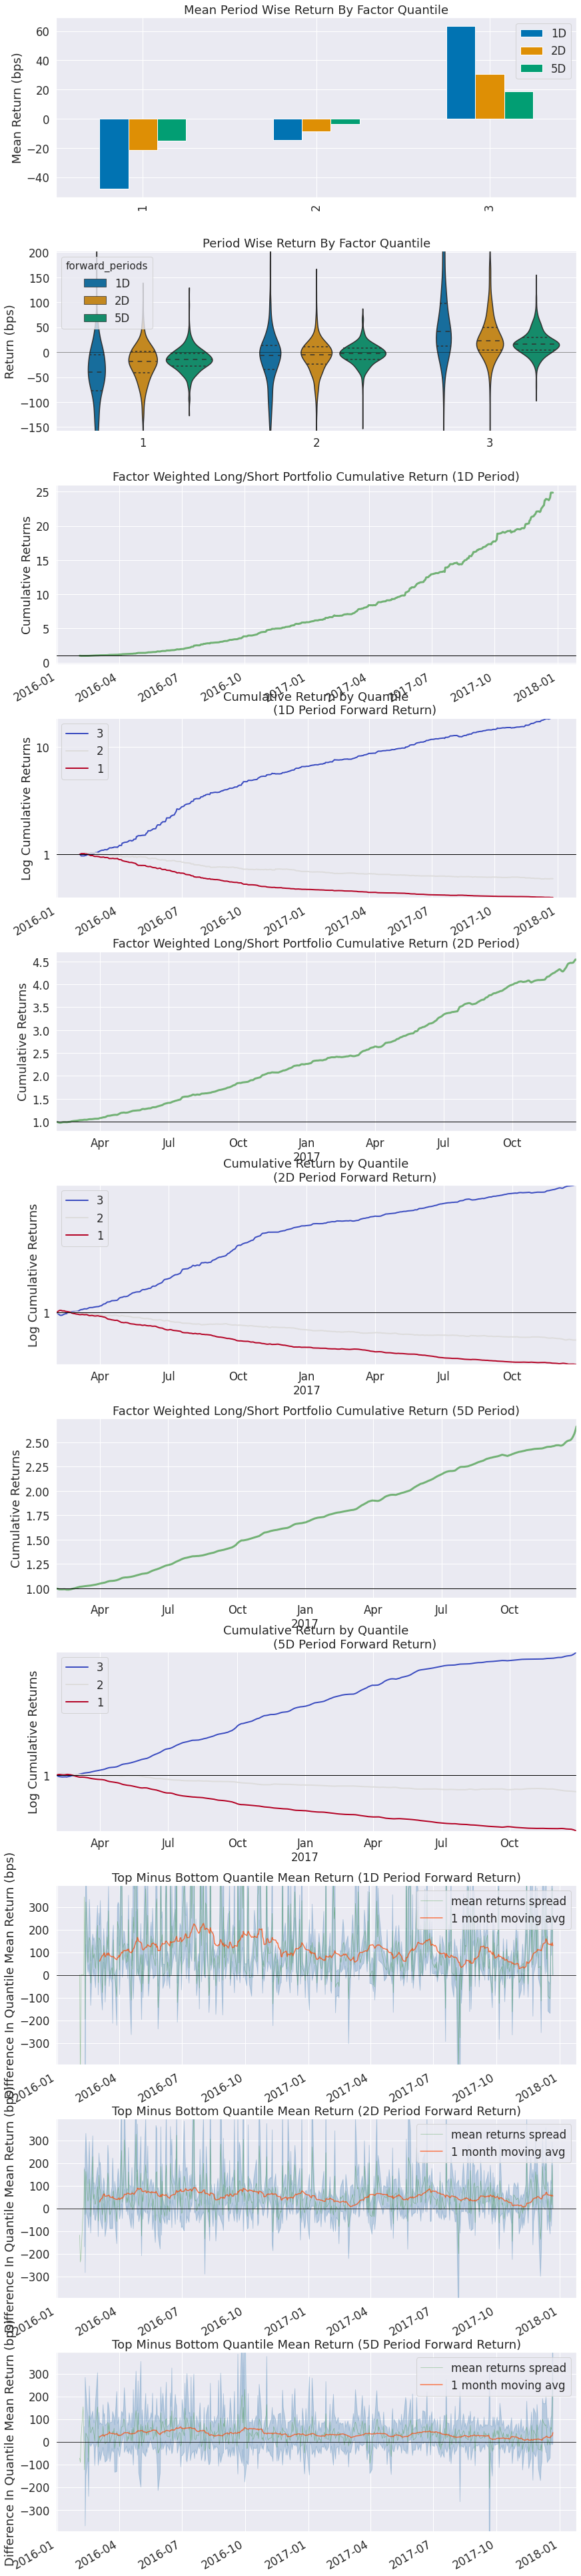

In [259]:
alphalens.tears.create_returns_tear_sheet(clf_factor_data)

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

In [ ]:
# wf_start_date = macd_data.dropna().reset_index().sort_values('date')['date'][0]
wf_start_date = datetime(2016, 3, 1)
wf_start_date

In [ ]:
training_window = 66
testing_window = 22

In [ ]:
def getPrices(data, start_date, training_window = None, test = False, testing_window = None):
    prices = data.loc[start_date: ].copy()
    if not test:
        prices_df = prices.iloc[:training_window]
    else:
        prices_df = prices.iloc[training_window:training_window + testing_window]
    prices_df.index = pd.to_datetime(prices_df.index)
    return prices_df

In [ ]:
train_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window)
test_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window, test = True, testing_window=testing_window)

In [ ]:
def getFactor(indicator, date_range):
    
    factor = indicator.reset_index()
    factor_filtered = factor[factor['date'].isin(date_range)].set_index(['date', 'asset'])
    return factor_filtered

In [ ]:
macd_data_train = getFactor(indicator = macd_data, date_range = train_prices.index)
volume_data_train = getFactor(indicator = volume_data, date_range = train_prices.index)

macd_data_test = getFactor(indicator = macd_data, date_range = test_prices.index)
volume_data_test = getFactor(indicator = volume_data, date_range = test_prices.index)

In [ ]:
def getCleanFactorData(factor, prices, quantiles = 3):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
        factor = factor, 
        prices = prices, 
        quantiles = quantiles, 
        max_loss = 0.75)
    return factor_data

In [ ]:
macd_factor_data_train = getCleanFactorData(factor = macd_data_train, prices = train_prices, quantiles = 3)
volume_factor_data_train = getCleanFactorData(factor = volume_data_train, prices = train_prices, quantiles = 3)

macd_factor_data_test = getCleanFactorData(factor = macd_data_test, prices = test_prices, quantiles = 3)
volume_factor_data_test = getCleanFactorData(factor = volume_data_test, prices = test_prices, quantiles = 3)

In [ ]:
def getData(macd_factor_data, volume_factor_data):
    macd_sig = macd_factor_data['factor']
    macd_sig.name = 'macd_sig'

    volume_bins = volume_factor_data['factor_quantile']
    volume_bins.name = 'volume_bins'

    target = macd_factor_data['1D']
    target.name = 'target'

    data = pd.concat([macd_sig, volume_bins, target], axis = 1)
    return data

In [ ]:
train = getData(macd_factor_data_train, volume_factor_data_train)
test = getData(macd_factor_data_test, volume_factor_data_test)

In [ ]:
train.head()

In [ ]:
train['target2']

In [ ]:
pd.qcut(train['target'], q = 3, labels = ['short', 'nothing', 'long'], duplicates = 'drop').value_counts().sum() #

In [ ]:
X_train = train[['macd_sig', 'volume_bins']]
y_train = train['target']

X_test = test[['macd_sig', 'volume_bins']]
y_test = test['target']

# Backtesting and Trading Simulation

# Summary and Conclusions